# <a name="0"> Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">hierarchical</a>
7. <a href="#6">DBSCAN</a>
8. <a href="#6">GaussianMixture</a>
9. <a href="#6">Specifications for each cluster</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import mstats
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [2]:
#read the data


df = pd.read_csv('CC GENERAL.csv')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


- **CUST_ID** : Identification of Credit Card holder (Categorical)
- **BALANCE** : Balance amount left in their account to make purchases (
- **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- **PURCHASES** : Amount of purchases made from account
- **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go
- **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment
- **CASH_ADVANCE** : Cash in advance given by the user
- **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- **PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
- **CASHADVANCETR** : Number of Transactions made with "Cash in Advanced"
- **PURCHASES_TRX** : Numbe of purchase transactions made
- **CREDIT_LIMIT** : Limit of Credit Card for user
- **PAYMENTS** : Amount of Payment done by user
- **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
- **PRCFULLPAYMENT** : Percent of full payment paid by user
- **TENURE** : Tenure of credit card service for user

In [ ]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find**

In [ ]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [ ]:
# This will print basic statistics for numerical columns
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

- there are one missed value in CREDIT_LIMIT ,  and there are 313 missed values in MINIMUM_PAYMENTS
- there are different ranges between features , there are features between [0,1] & another features between [0:8000)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [ ]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

# EDA

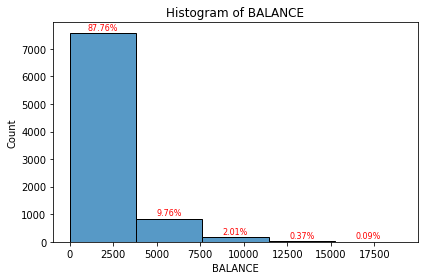

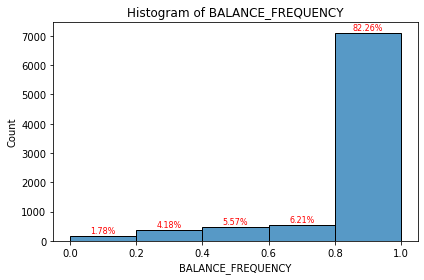

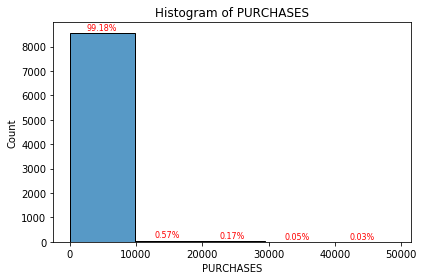

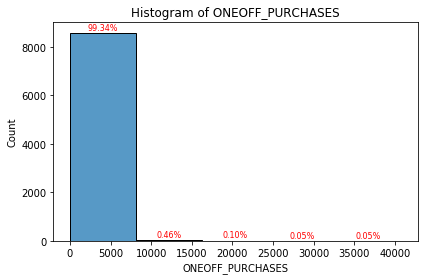

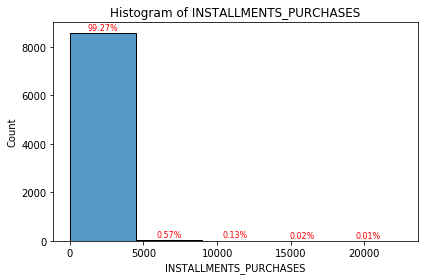

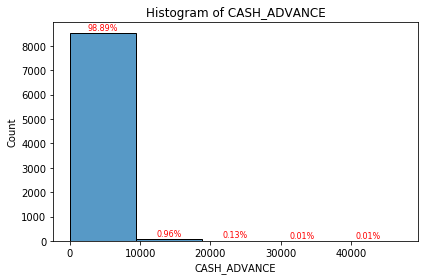

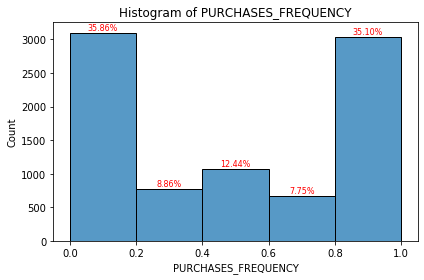

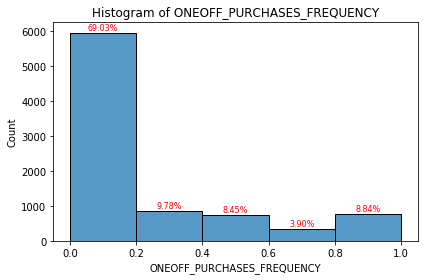

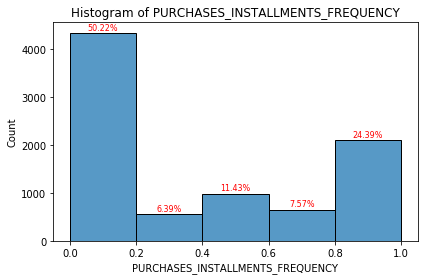

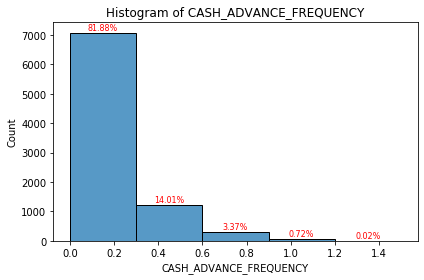

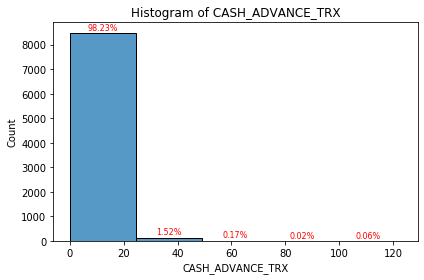

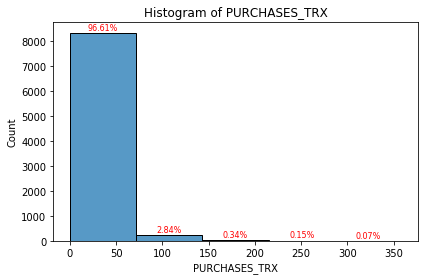

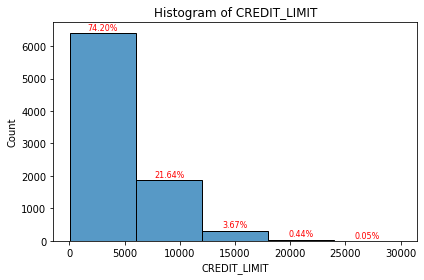

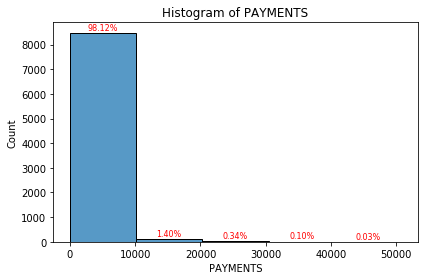

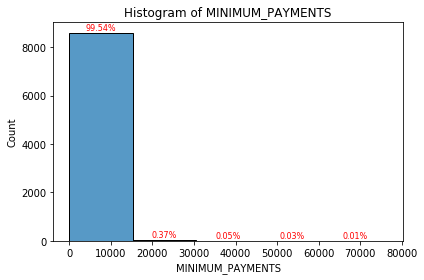

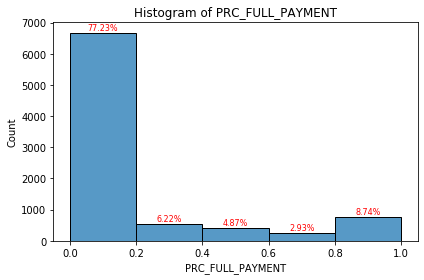

In [ ]:
columns_ = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
columns = df[columns_].dropna()


for column in columns_:
    plt.figure(figsize=(6, 4))
    sns.histplot(columns[column], bins=5, kde=False)
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.title(f'Histogram of {column}')


    counts, bins = np.histogram(columns[column], bins=5)
    percentages = (counts / len(columns[column])) * 100


    for count, bin_edge, percentage in zip(counts, bins[:-1], percentages):
        plt.annotate(f'{percentage:.2f}%', xy=(bin_edge + np.diff(bins)[0] / 2, count), xytext=(0, 1),
                     textcoords='offset points', ha='center', va='bottom', fontsize=8, color='red')

    plt.tight_layout()


- "BALANCE":The majority of customers, specifically 87.76%, tend to keep their account balances below $4000. This suggests a prevailing inclination toward cautious spending habits and financial prudence among the customer base.     

- "BALANCE_FREQUENCY":The majority of individuals, specifically 82.26% of them, exhibit a proactive stance in managing their finances. A considerable percentage of customers consistently update their account balances, showcasing a keen interest in monitoring their financial status and staying informed about credit card activities. This trend indicates a preference for using credit cards, highlighting customers' convenience and ease in conducting transactions through this method.    

- "PURCHASES":99% of customers tend to make purchases, with the highest single purchase being under $10,000, indicating a preference for moderate spending.    

- "ONEOFF_PURCHASES":99% of customers made a single payment without any installment arrangements, and the highest amount spent in one transaction did not exceed $8,000. This underscores their conscientious approach to financial responsibilities.    

- "INSTALLMENTS_PURCHASES":most customers (99%) prefer purchases under $5000 in installments, showcasing a preference for budget-friendly spending and manageable repayment plans.     

-  "CASH_ADVANCE":The vast majority,  98.89% of customers, have engaged in several transactions with prepayment in cash. These transactions vary in volume, spanning from 0 to Less than 10000$, indicating sporadic usage or urgent financial requirements.   

- "PURCHASES_FREQUENCY":Approximately 35% of customers refrain from frequent purchasing activities, while another 35% engage in recurring transactions. This suggests disparities in the living standards among the customer base.    

- "ONEOFF_PURCHASES_FREQUENCY":A majority of 69% of customers prefer making single lump-sum payments, indicating a lack of interest in installment plans. This suggests their commitment to financial responsibilities.    

- "CASH_ADVANCE_FREQUENCY":Roughly 82% of customers dislike purchasing through installment plans, reflecting their sense of responsibility. They seem to prioritize essential needs, refraining from buying non-essential items, even on credit. Their preference lies in making one-time payments.    

- "CREDIT_LIMIT":The majority, about 74% of customers, have credit card limits below $6000, suggesting a prevalent inclination towards moderate credit limits.

- "PAYMENTS":For 98% of customers, the cumulative payments made by each user remain below $10,000. This points to a pattern of responsible credit management and a conservative approach to financial transactions.    

- "MINIMUM_PAYMENTS":Approximately 99% of customers have minimum payments under $15,000, suggesting responsible credit management practices and a conservative approach to financial transactions.    

- "PRC_FULL_PAYMENT":A majority of 77% of customers lean towards options other than paying the full amount upfront, indicating a preference for partial payments or utilizing revolving credit.    

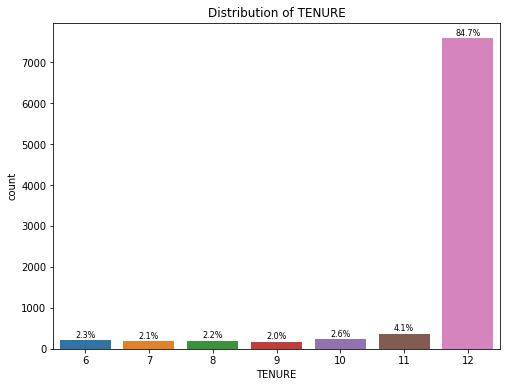

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='TENURE')


total = len(df['TENURE'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total:.1%}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center',
                fontsize=8)

plt.title('Distribution of TENURE')
plt.show()

- The credit card service tenure for the majority of customers, specifically 84.7%, spans over a 12-month period.

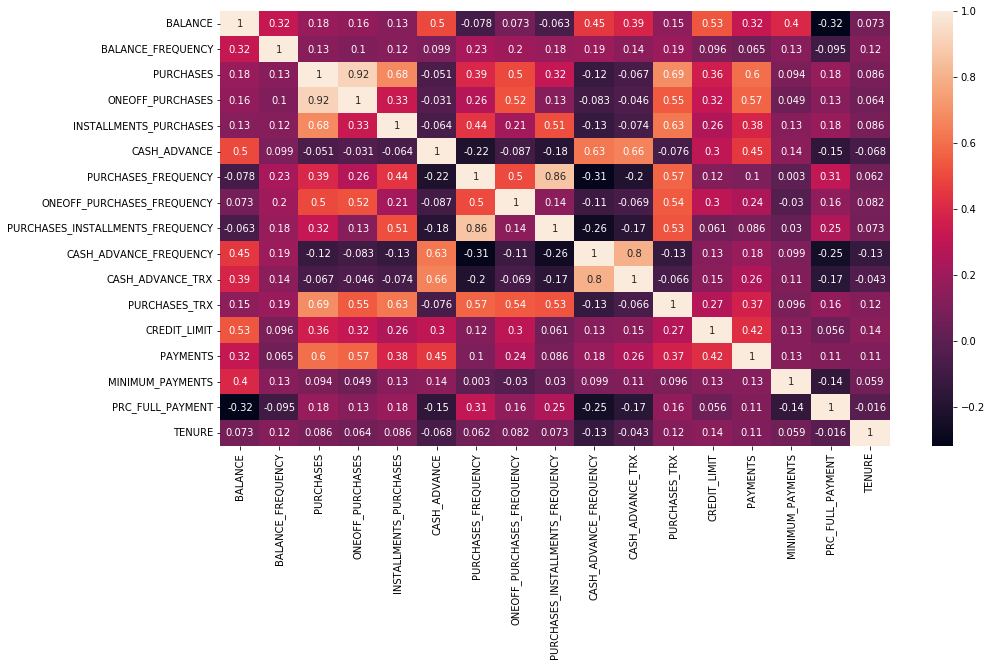

In [ ]:
features = df.iloc[:, 1:]
plt.figure(figsize=(15, 8))
sns.heatmap(features.corr(), annot=True)
plt.show()

there are correlation between :
    - CASH_ADVANCE_TRX, CASH_ADVANCE_FREQUENCY
    - PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY
    - PURCHASES, ONEOFF_PURCHASES

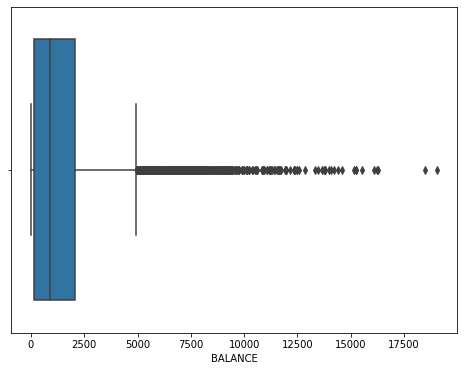

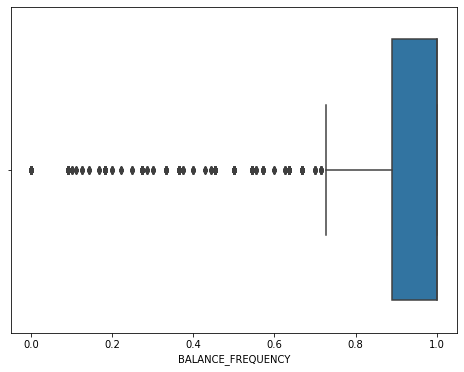

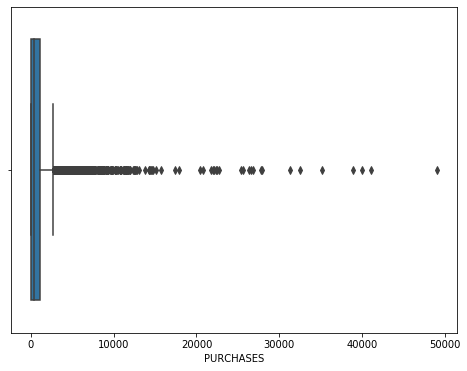

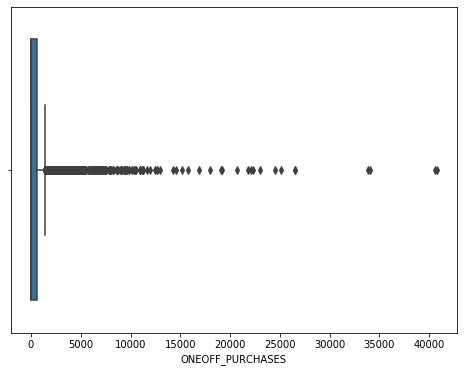

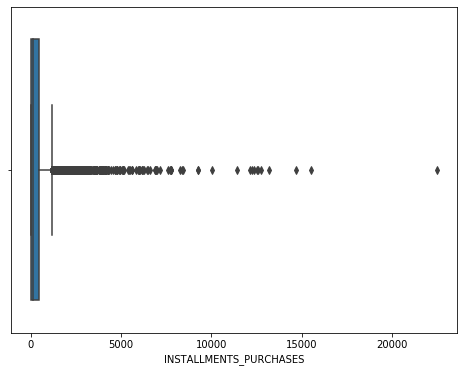

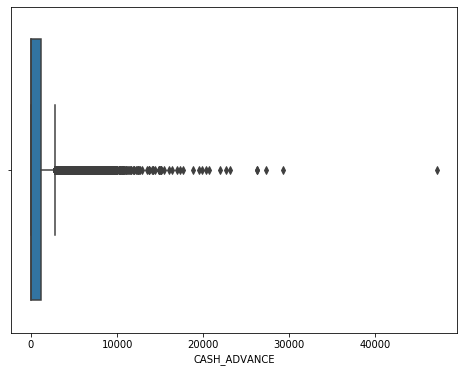

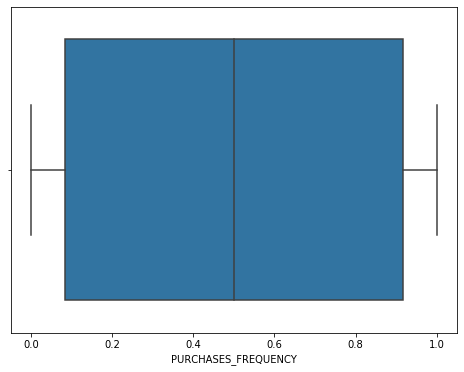

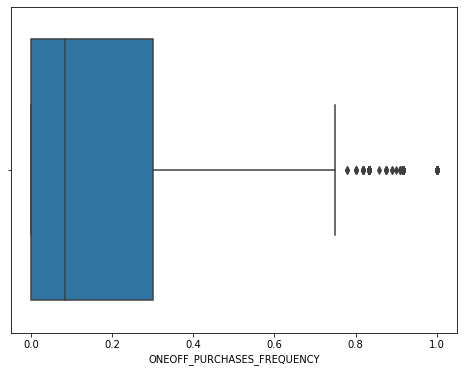

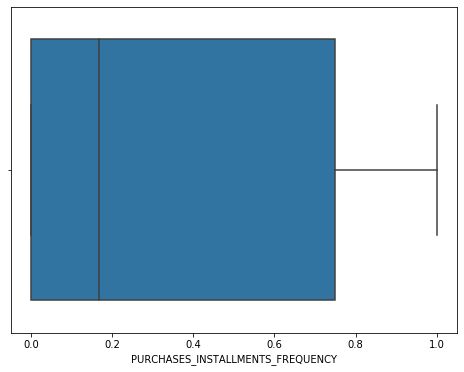

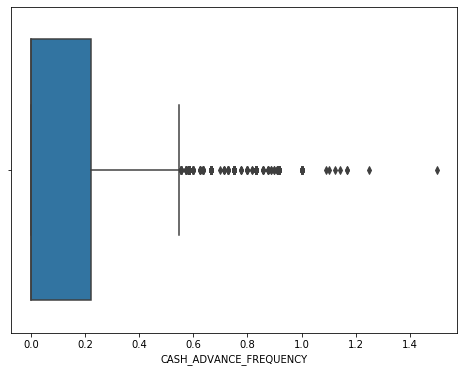

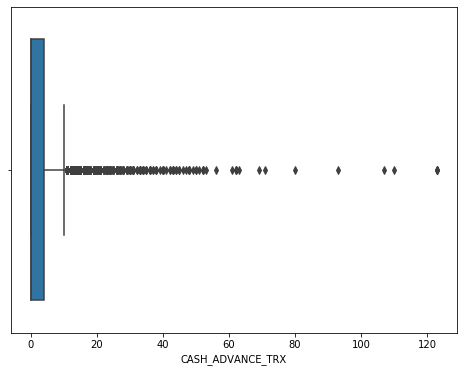

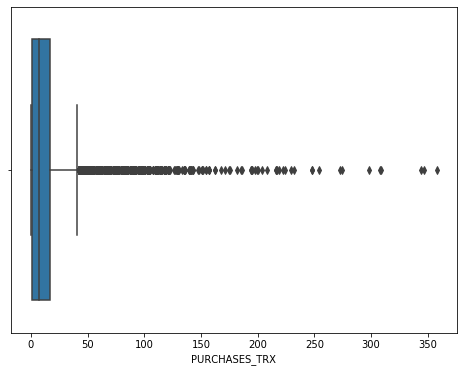

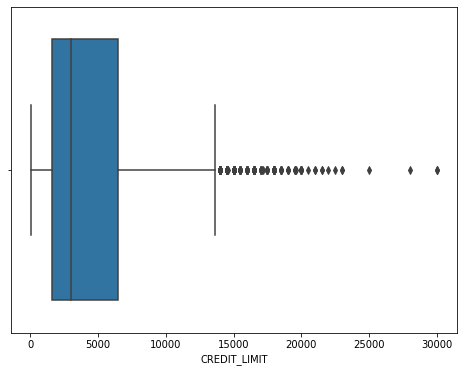

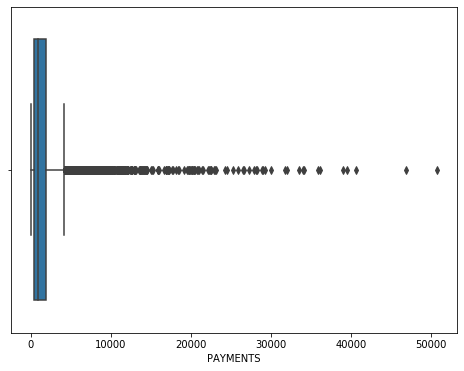

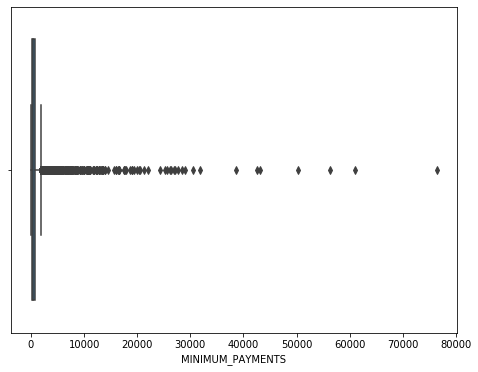

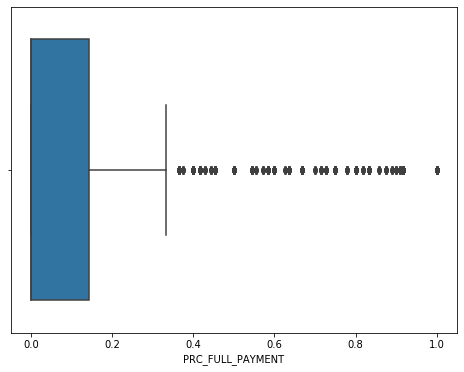

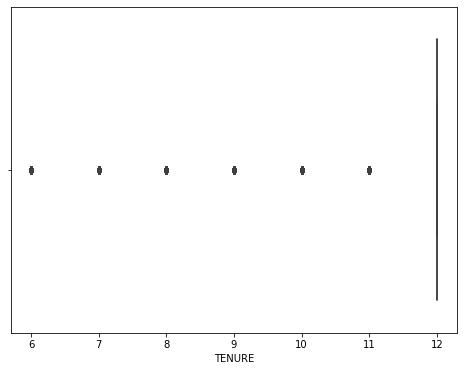

In [ ]:
for col in features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df,x=col)
        plt.xlabel(col)
        plt.show()

- there are outliers in many coloumns

Skewness for column 'BALANCE': 2.392984897743557 



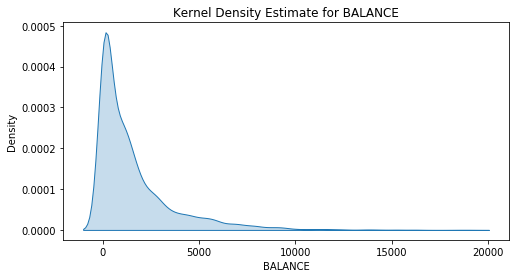

Skewness for column 'BALANCE_FREQUENCY': -2.022926407947498 



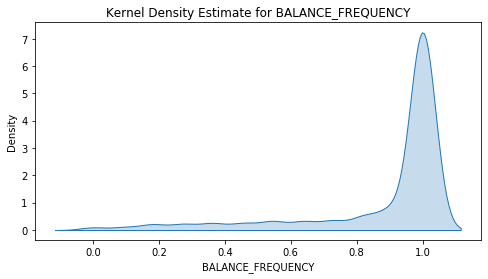

Skewness for column 'PURCHASES': 8.14290403970826 



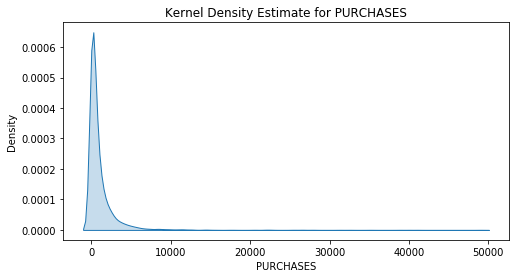

Skewness for column 'ONEOFF_PURCHASES': 10.043399272872994 



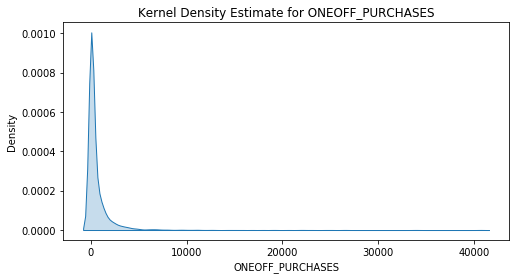

Skewness for column 'INSTALLMENTS_PURCHASES': 7.297896535603957 



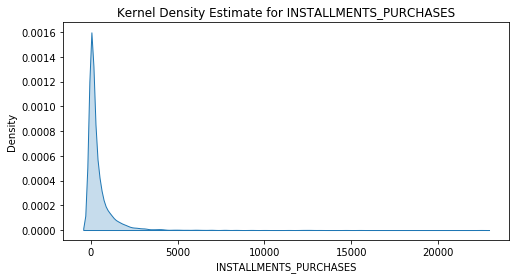

Skewness for column 'CASH_ADVANCE': 5.165743121623766 



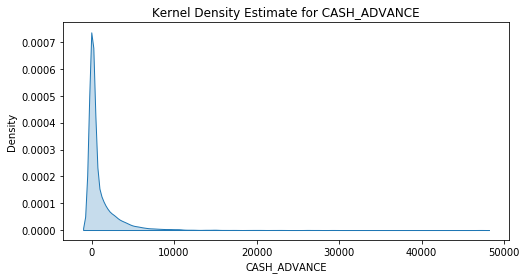

Skewness for column 'PURCHASES_FREQUENCY': 0.060154151997082954 



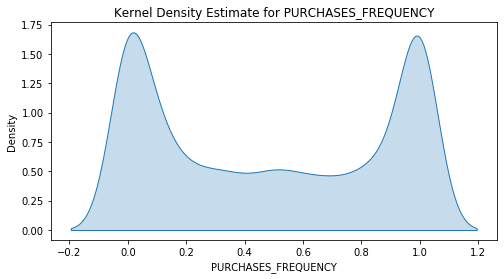

Skewness for column 'ONEOFF_PURCHASES_FREQUENCY': 1.535355406271309 



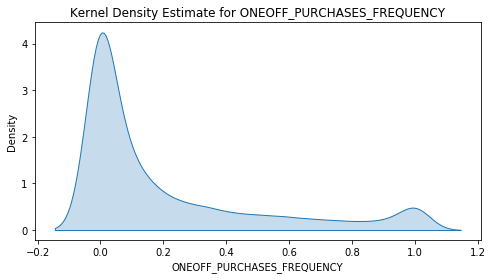

Skewness for column 'PURCHASES_INSTALLMENTS_FREQUENCY': 0.5091158200492595 



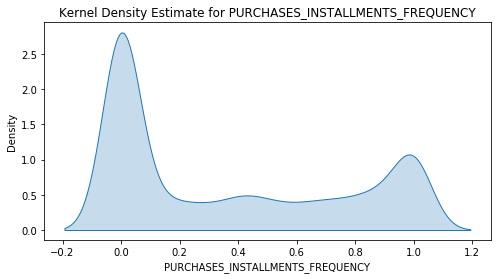

Skewness for column 'CASH_ADVANCE_FREQUENCY': 1.828379768476593 



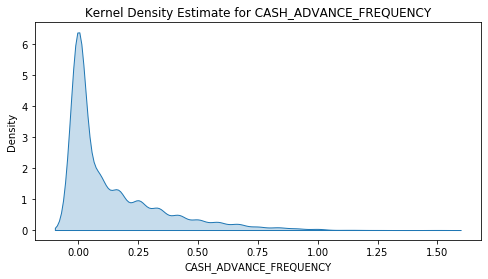

Skewness for column 'CASH_ADVANCE_TRX': 5.720339281754528 



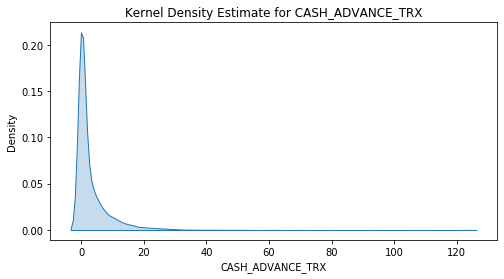

Skewness for column 'PURCHASES_TRX': 4.629879142324137 



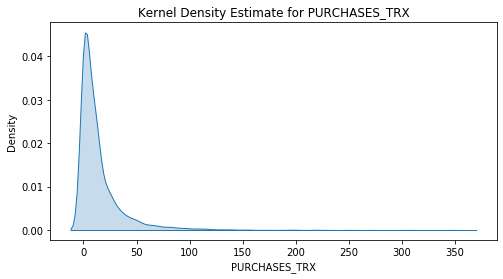

Skewness for column 'CREDIT_LIMIT': nan 



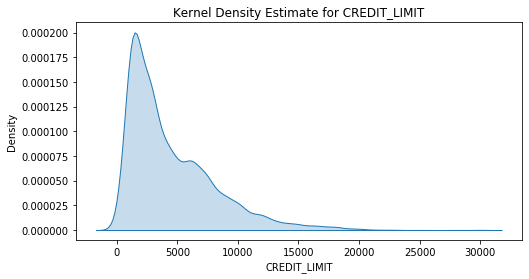

Skewness for column 'PAYMENTS': 5.906629644423578 



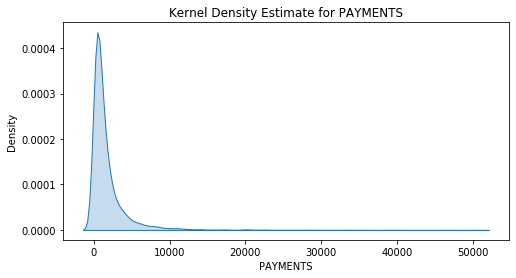

Skewness for column 'MINIMUM_PAYMENTS': nan 



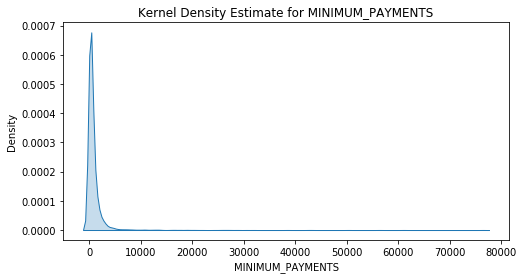

Skewness for column 'PRC_FULL_PAYMENT': 1.942494313531204 



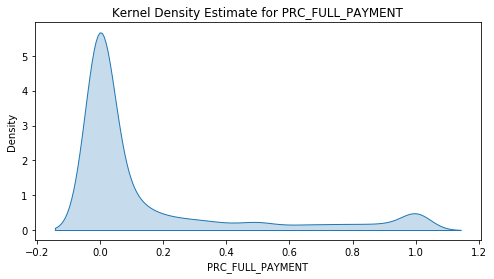

Skewness for column 'TENURE': -2.942524021534386 



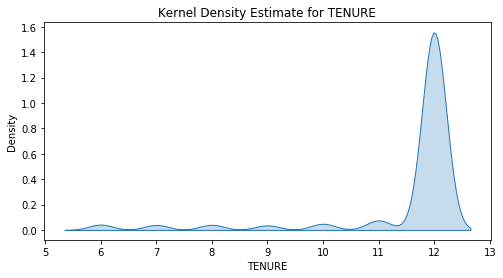

In [ ]:
for column_name in features.columns:
    data = features[column_name]
    skewness = stats.skew(data)

    print(f"Skewness for column '{column_name}':", skewness,"\n")
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data, fill=True, palette='Blues')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.title(f'Kernel Density Estimate for {column_name}')
    plt.show()

- Most columns are  skewness

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-  "CUST_ID": This column is not impactful on the output.         <br>
2- there are 313 missing value in "MINIMUM_PAYMENTS" column and 1 missing value in "CREDIT_LIMIT" column          <br>
3- there are skewness & outliers in many coloumns          <br>

In [ ]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [ ]:
#solution
#I will remove "CUST_ID"
df_copy = df_copy.drop('CUST_ID', axis=1)

- there are colleration betweem PURCHASES_INSTALLMENTS_FREQUENCY , ONEOFF_PURCHASES , CASH_ADVANCE_FREQUENCY so i will drop them too

In [ ]:
df_copy.drop(columns=['PURCHASES_INSTALLMENTS_FREQUENCY',
                      'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY' ], inplace=True)

In [ ]:
#test
df_copy.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  INSTALLMENTS_PURCHASES  \
0    40.900749           0.818182      95.40                    95.4   
1  3202.467416           0.909091       0.00                     0.0   
2  2495.148862           1.000000     773.17                     0.0   
3  1666.670542           0.636364    1499.00                     0.0   
4   817.714335           1.000000      16.00                     0.0   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0      0.000000             0.166667                    0.000000   
1   6442.945483             0.000000                    0.000000   
2      0.000000             1.000000                    1.000000   
3    205.788017             0.083333                    0.083333   
4      0.000000             0.083333                    0.083333   

   CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
0                 0              2        1000.0   201.802084   
1                 4              0        7000.0  4103.032597   
2                 0             12        7500.0   622.066742   
3                 1              1        7500.0     0.000000   
4                 0              1        1200.0   678.334763   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        139.509787          0.000000      12  
1       1072.340217          0.222222      12  
2        627.284787          0.000000      12  
3               NaN          0.000000      12  
4        244.791237          0.000000      12

**Second issue**
- About CREDIT_LIMIT column, there are 8950 rows in dataset, so removing 1 row is much better way to save time

- But in MINIMUM_PAYMENTS column there are 313 missing values. I can remove them because it's not a huge number in 8950 rows, but I will try to fill them

In [ ]:
#solution
df_copy= df_copy.dropna (subset = ['CREDIT_LIMIT'])
df_copy.fillna(df_copy.median() , inplace = True)

In [ ]:
#test
df_copy.isnull().sum()

BALANCE                       0
BALANCE_FREQUENCY             0
PURCHASES                     0
INSTALLMENTS_PURCHASES        0
CASH_ADVANCE                  0
PURCHASES_FREQUENCY           0
ONEOFF_PURCHASES_FREQUENCY    0
CASH_ADVANCE_TRX              0
PURCHASES_TRX                 0
CREDIT_LIMIT                  0
PAYMENTS                      0
MINIMUM_PAYMENTS              0
PRC_FULL_PAYMENT              0
TENURE                        0
dtype: int64

###### Third issue

In [ ]:
# Apply log transformation to skewed features
skewness_features = ['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
                     'PAYMENTS', 'MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']
df_copy[skewness_features] = np.log(df_copy[skewness_features] + 0.1)

In [ ]:
df_copy.skew()

BALANCE                      -1.178399
BALANCE_FREQUENCY            -2.024193
PURCHASES                    -0.971036
INSTALLMENTS_PURCHASES       -0.124961
CASH_ADVANCE                  0.185856
PURCHASES_FREQUENCY           0.059970
ONEOFF_PURCHASES_FREQUENCY    1.535453
CASH_ADVANCE_TRX              0.410488
PURCHASES_TRX                -0.582282
CREDIT_LIMIT                 -0.102317
PAYMENTS                     -2.730197
MINIMUM_PAYMENTS              0.118761
PRC_FULL_PAYMENT              1.942641
TENURE                       -2.944788
dtype: float64

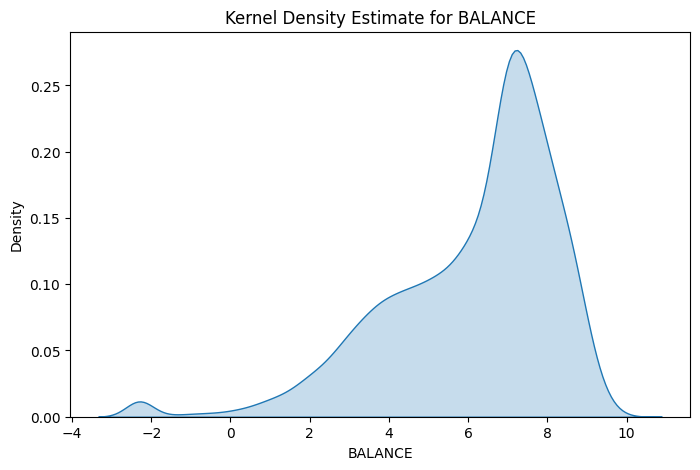

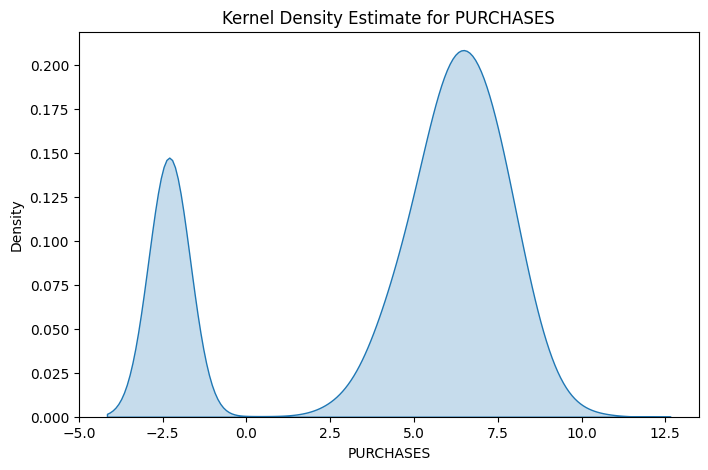

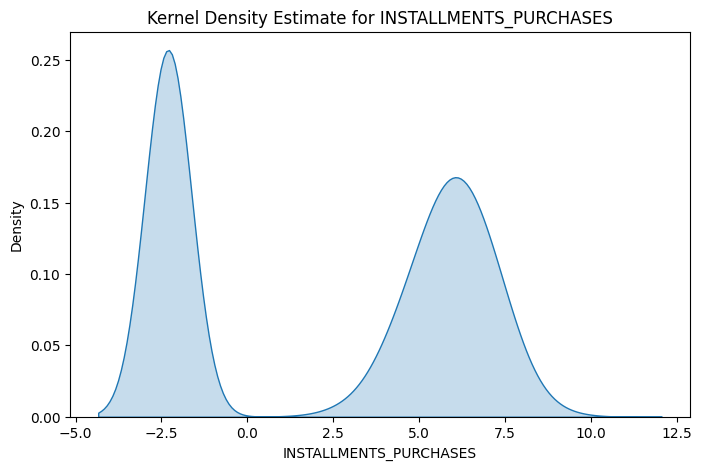

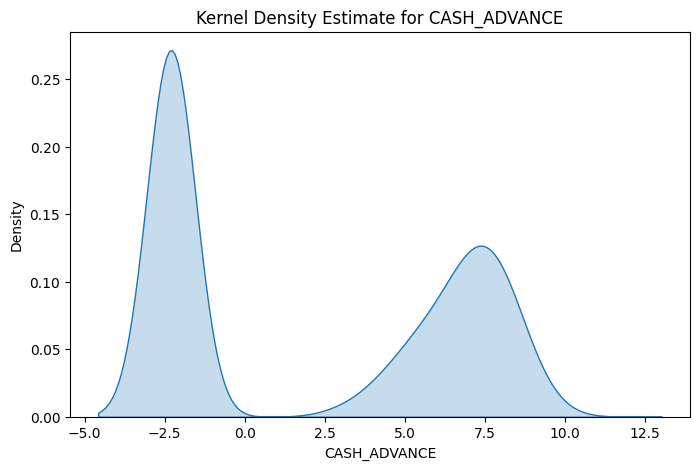

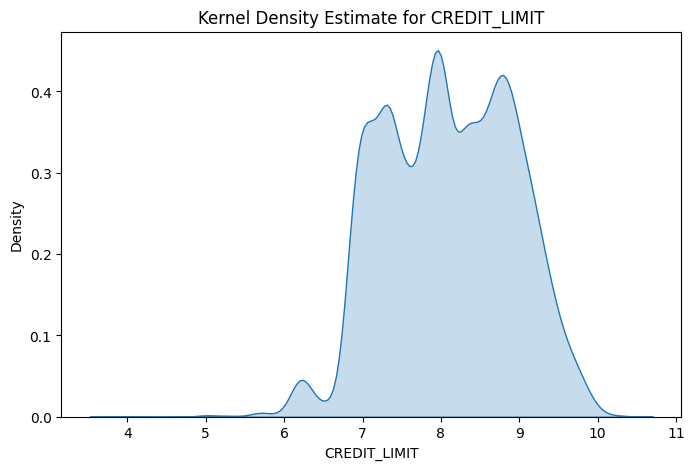

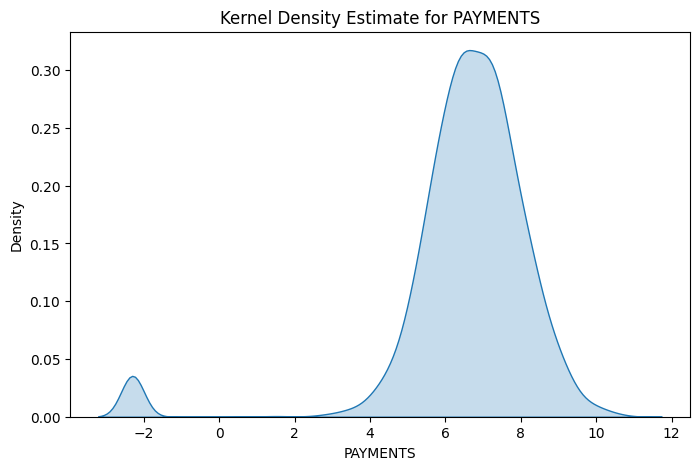

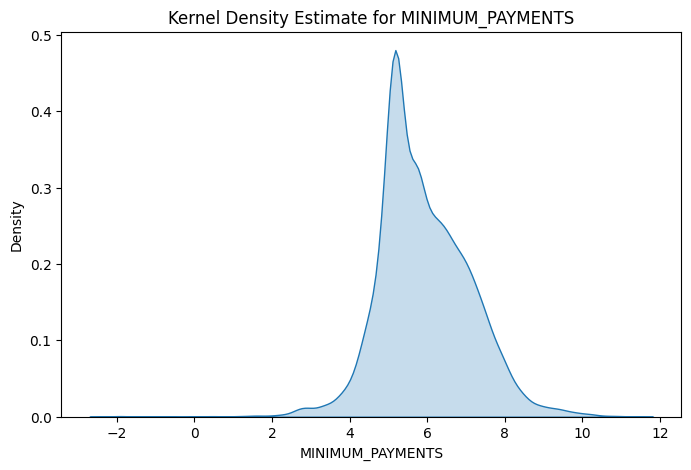

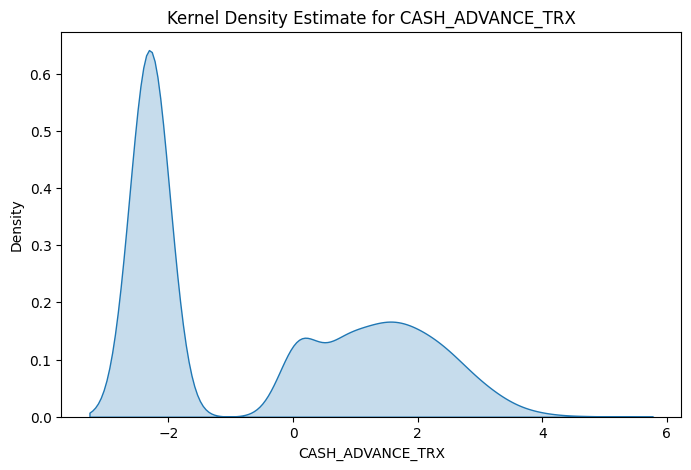

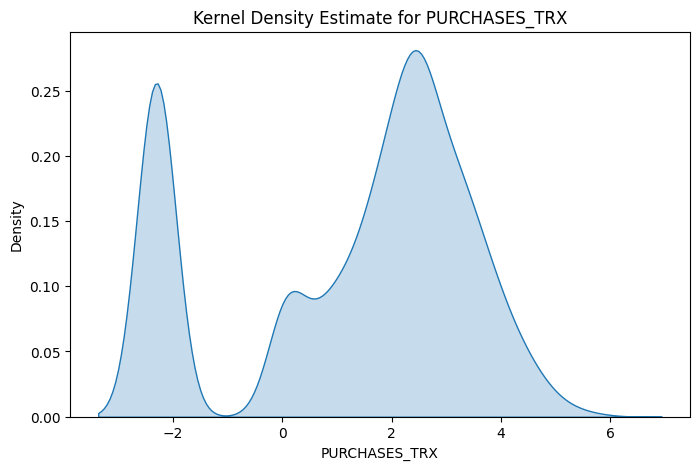

In [ ]:
for col in list(df_copy[skewness_features].columns):
    if df_copy[col].nunique() > 7:
        plt.figure(figsize=(8,5))
        sns.kdeplot(df_copy[col], fill=True, palette='Blues')
        plt.title(f'Kernel Density Estimate for {col}')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.show()


In [ ]:
# Winsorization to handle outliers using mstats.winsorize
for column_name in skewness_features:
    df_copy[column_name] = mstats.winsorize(df_copy[column_name], limits=[0.05, 0.05])

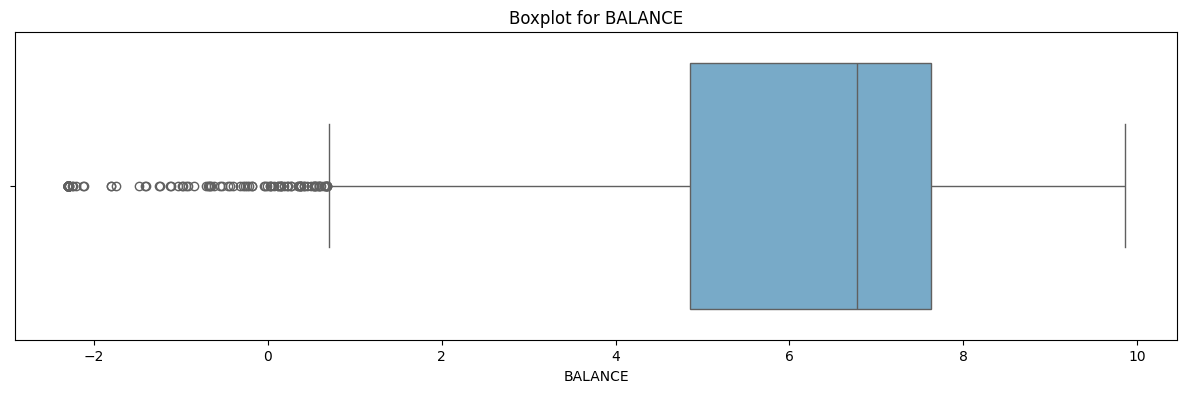

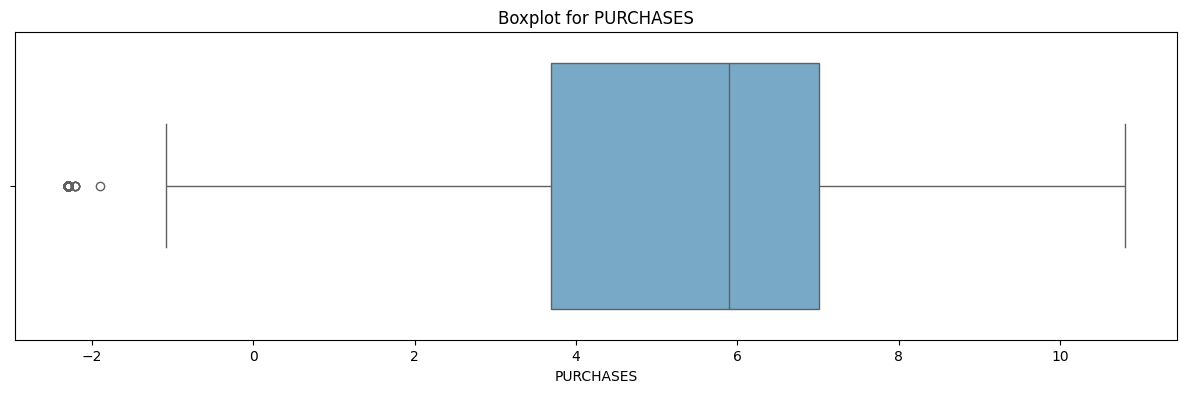

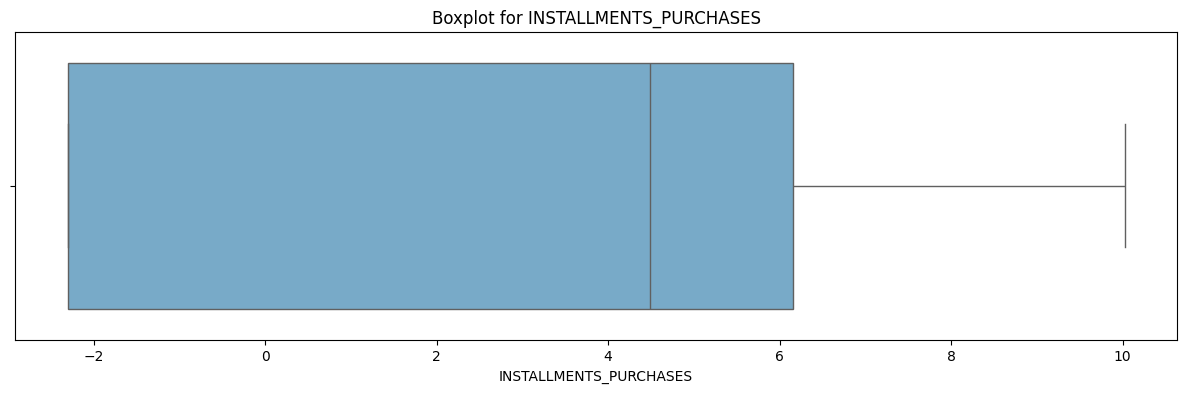

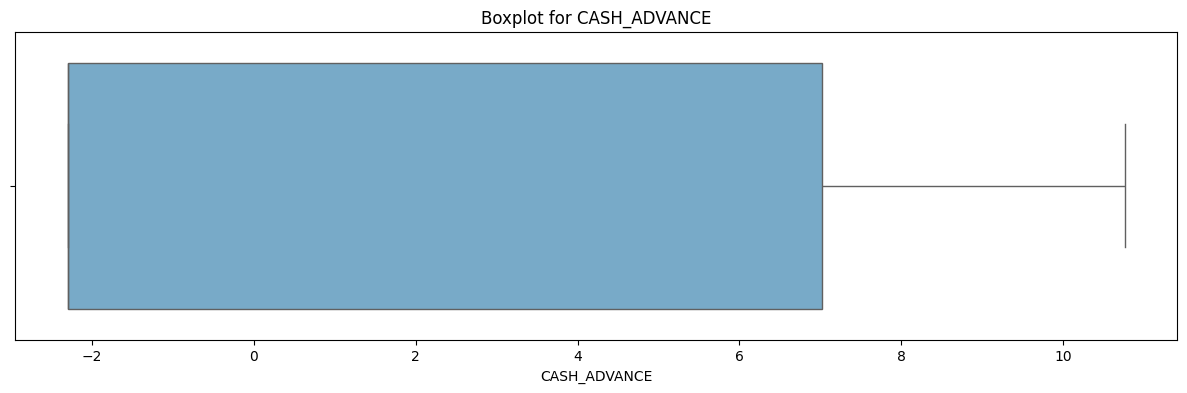

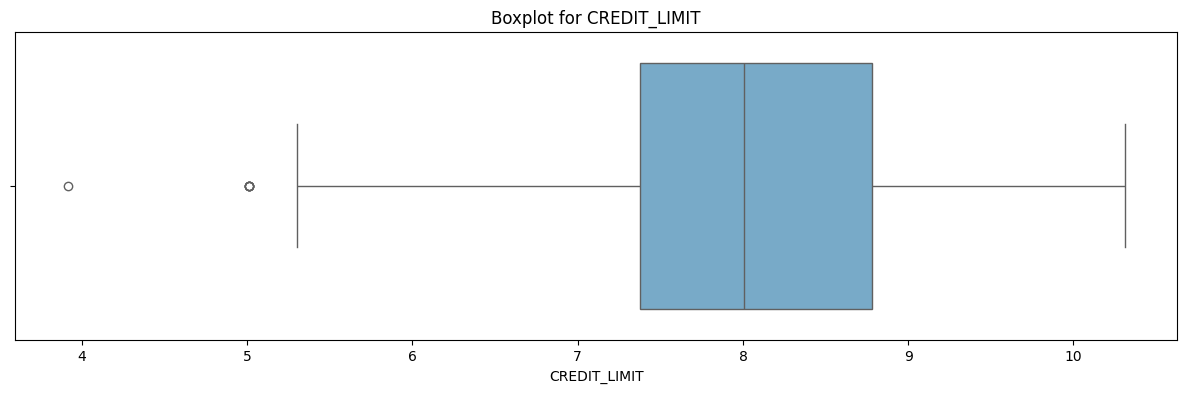

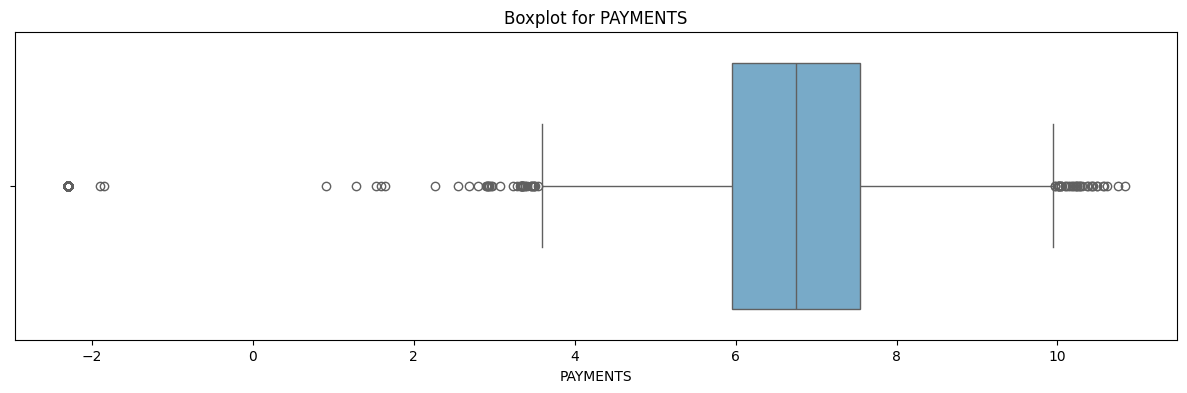

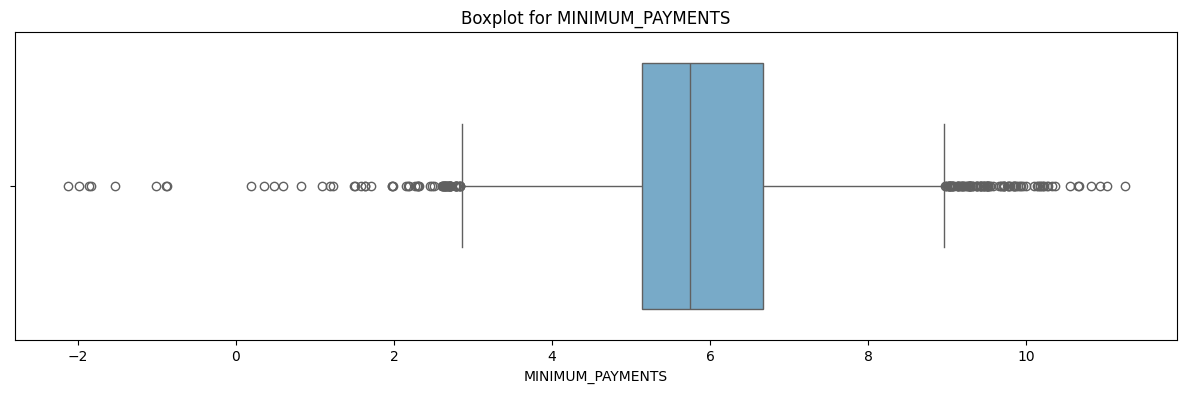

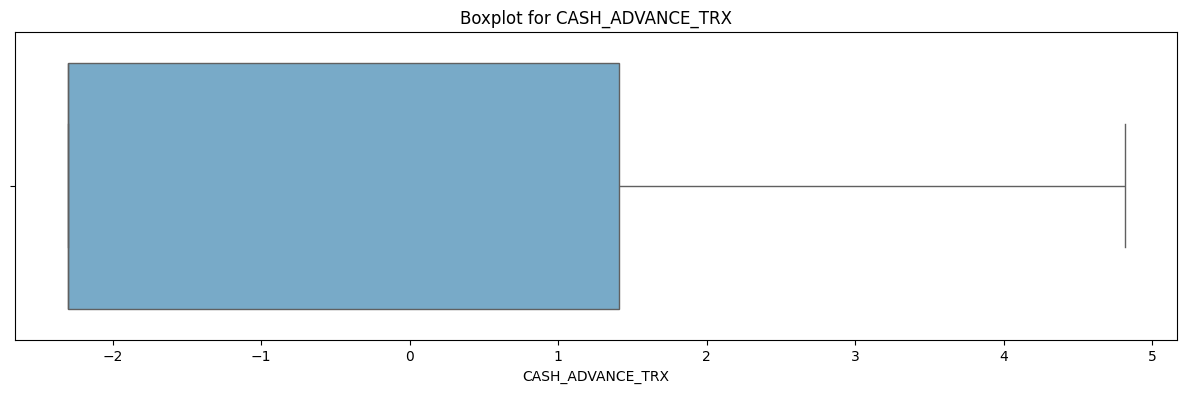

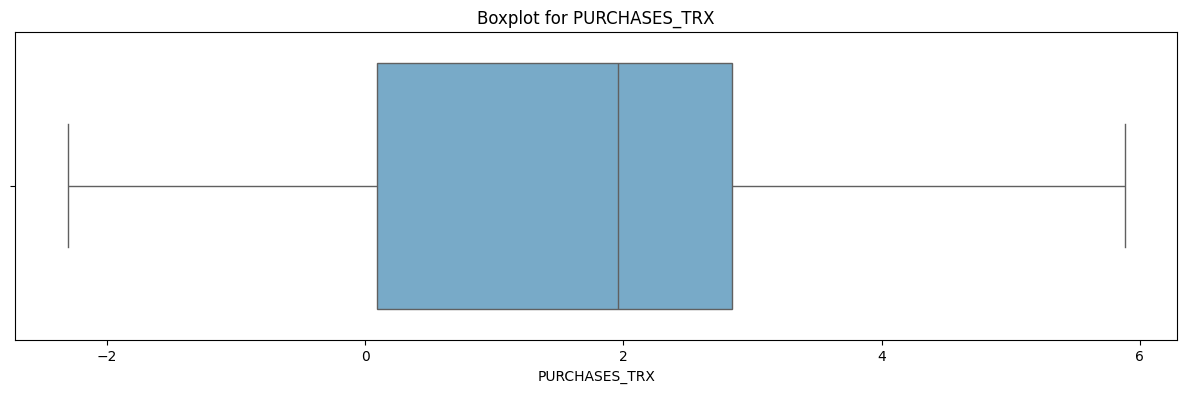

In [ ]:
for col in list(df_copy[skewness_features].columns):
    if df_copy[col].nunique() > 7:
        plt.figure(figsize=(15, 4))
        sns.boxplot(x=col, linewidth=1.0, palette='Blues', data=df_copy)
        plt.title(f'Boxplot for {col}')
        plt.xlabel(col)
        plt.show()


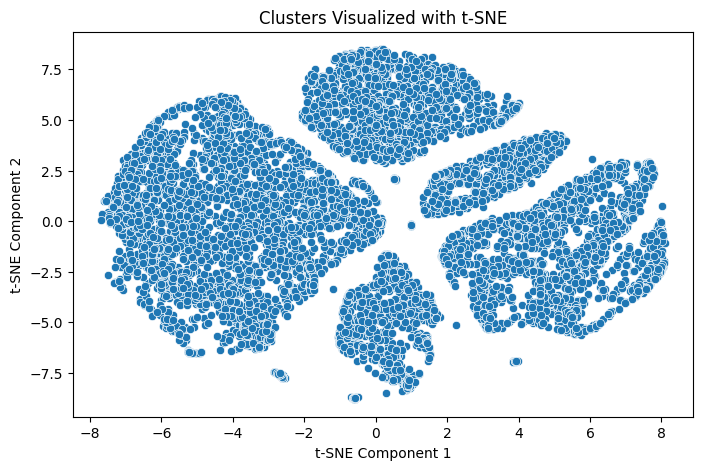

In [ ]:
# Apply t-SNE
plt.figure(figsize=(8,5))
tsne = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
X_tsne = tsne.fit_transform(df_copy)


df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])


sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [ ]:
df_copy2=df.copy()

In [ ]:
df_copy2.dropna(inplace=True)

In [ ]:
features_to_pca = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
]
df_copy2= df_copy2[features_to_pca]

# Standardize the data
scaler_robust = RobustScaler()
df_copy_standardized = scaler_robust.fit_transform(df_copy2)


In [ ]:
# Apply PCA
pca = PCA(n_components='mle')
df_copy_pca_result = pca.fit_transform(df_copy_standardized)

In [ ]:
df_copy_pca_result.shape

(8636, 13)

In [ ]:
# Features for t-SNE
features_for_tsne = [f'PC{i+1}' for i in range(df_copy_pca_result.shape[1])]

# Create a DataFrame with PCA components
df_copy_pca_result_df = pd.DataFrame(data=df_copy_pca_result, columns=features_for_tsne)


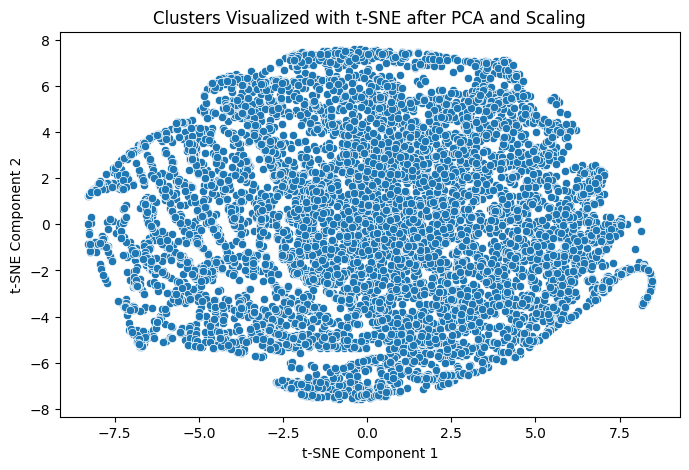

In [ ]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=0.1, n_iter=2000)
X_tsne = tsne.fit_transform(df_copy_pca_result_df)

# Create a DataFrame with t-SNE components
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Visualize clusters using t-SNE
plt.figure(figsize=(8, 5))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE after PCA and Scaling')
plt.show()

# Another preprocessing

In [3]:
df_copy3=df.copy()

In [4]:
df_copy3.head(3)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                         0.0                          0.083333   
1                         0.0                          0.000000   
2                         1.0                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12

In [5]:
df_copy3.dropna(inplace=True)

In [6]:
df_copy3.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
df_copy3.drop(columns=['CUST_ID', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                      'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY' ], inplace=True)

In [8]:
df_copy3.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [9]:
skewness_features = ['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
                     'PAYMENTS', 'MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']
df_copy3[skewness_features] = np.log(df_copy3[skewness_features] + 0.1)

In [10]:
df_copy3.skew()

BALANCE                      -0.904675
BALANCE_FREQUENCY            -2.084161
PURCHASES                    -0.980708
INSTALLMENTS_PURCHASES       -0.140807
CASH_ADVANCE                  0.170686
PURCHASES_FREQUENCY           0.033041
ONEOFF_PURCHASES_FREQUENCY    1.504234
CASH_ADVANCE_TRX              0.393508
PURCHASES_TRX                -0.599293
CREDIT_LIMIT                 -0.107283
PAYMENTS                     -0.109795
MINIMUM_PAYMENTS              0.101950
PRC_FULL_PAYMENT              1.886027
TENURE                       -3.011141
dtype: float64

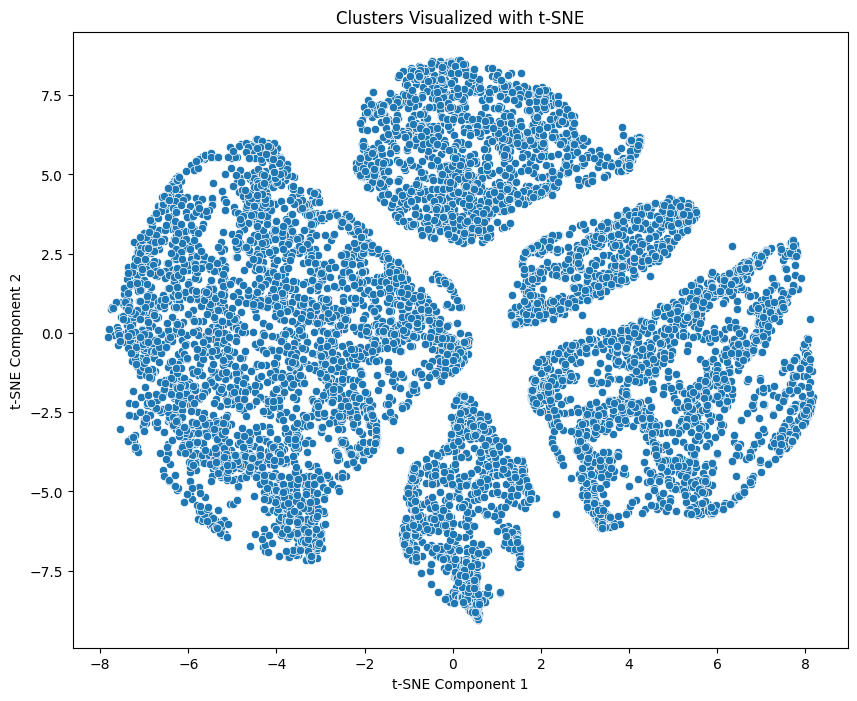

In [11]:
# Apply t-SNE
plt.figure(figsize=(10,8))
tsne = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)
X_tsne = tsne.fit_transform(df_copy3)


df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])


sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you
5- Using different techniques for scaling and comment on the result

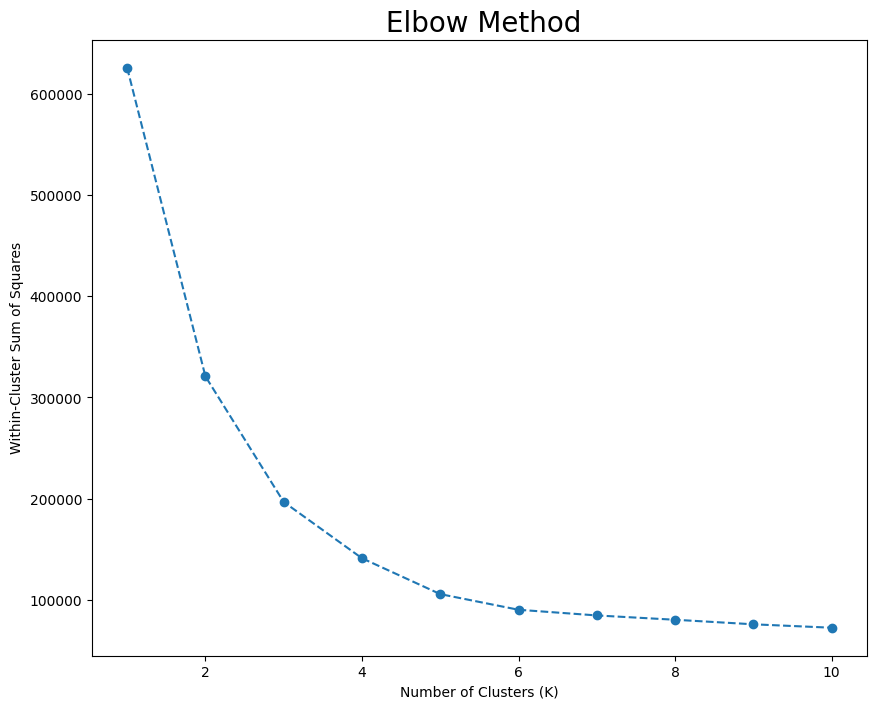

In [ ]:
wcss = []
plt.figure(figsize=(10,8))
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(df_copy3)
    wcss.append(km.inertia_)


plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title(' Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

- The best number of clusters, based on the elbow method, appears to be 5.

In [65]:
class KMeans:
    def __init__(self, K):
        self.K = K
        self.centroids = None
        self.labels = None

    def fit(self, X, max_iters=100):
        self.centroids = self.kMeansInitCentroids(X)
        for _ in range(max_iters):
            self.labels = self.findClosestCentroids(X)
            self.centroids = self.computeCentroids(X)

    def kMeansInitCentroids(self, X):
        centroids = np.zeros((self.K, X.shape[1]))
        centroids = X[np.random.choice(X.shape[0], size=(self.K), replace=False), :]
        return centroids

    def findClosestCentroids(self, X):
        idx = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            dist = np.linalg.norm(X[i, :] - self.centroids, axis=1)
            idx[i] = np.argmin(dist)
        return idx

    def computeCentroids(self, X):
        centroids = np.zeros((self.K, X.shape[1]))
        for i in range(self.K):
            centroids[i, :] = np.mean(X[self.labels == i], axis=0)
        return centroids

    def predict(self, x):
        dist = np.linalg.norm(x - self.centroids, axis=1)
        label = np.argmin(dist)
        return label


In [72]:
df_copy4=df_copy3.to_numpy()

In [73]:
kmeans_model = KMeans(5)

In [74]:
kmeans_model .fit(df_copy4)

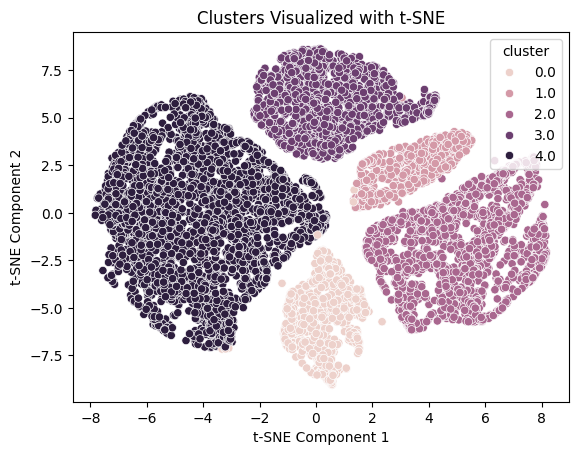

In [76]:
df_tsne['cluster'] = kmeans_model.labels
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5 )


kmeans.fit(df_copy3)

KMeans(n_clusters=5)

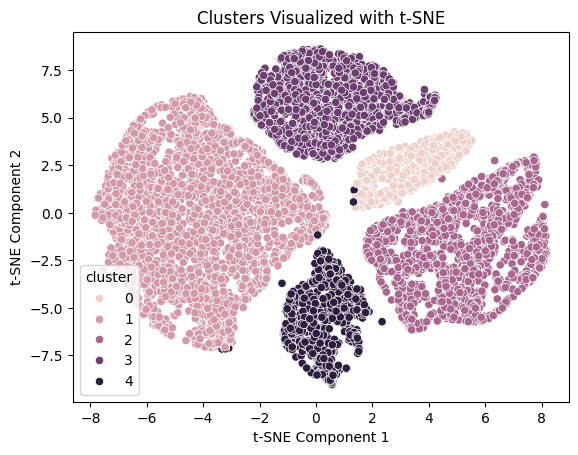

In [ ]:
df_tsne['cluster'] = kmeans.labels_


sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

## 6. <a name="6">hierarchical</a>
(<a href="#6">Go to top</a>)

### *Number of clusters*
Use Dendograms to specify the optimum number of clusters


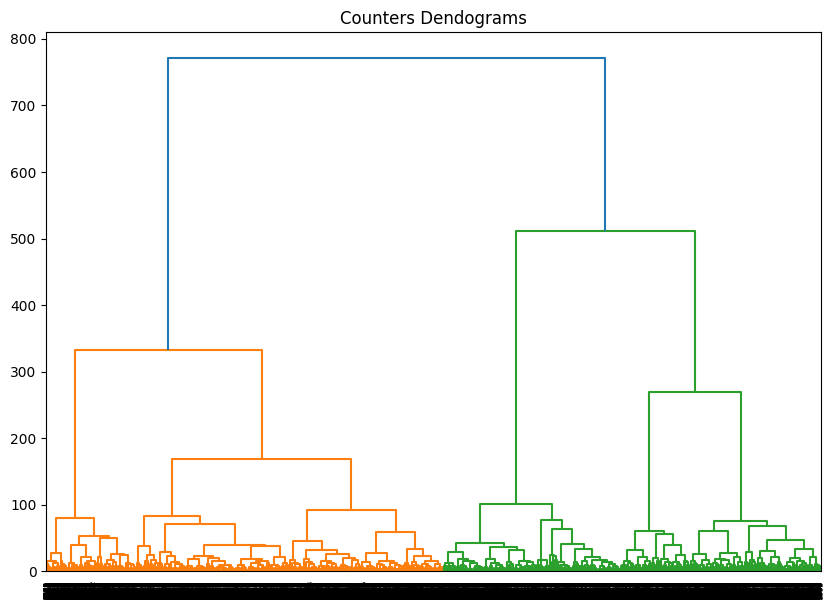

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy3 ,
                                  method='ward',
                                  metric='euclidean'),
                        orientation='top')

In [ ]:
#training

hier_model = AgglomerativeClustering(n_clusters=5)
hier_model.fit(df_copy3)




AgglomerativeClustering(n_clusters=5)

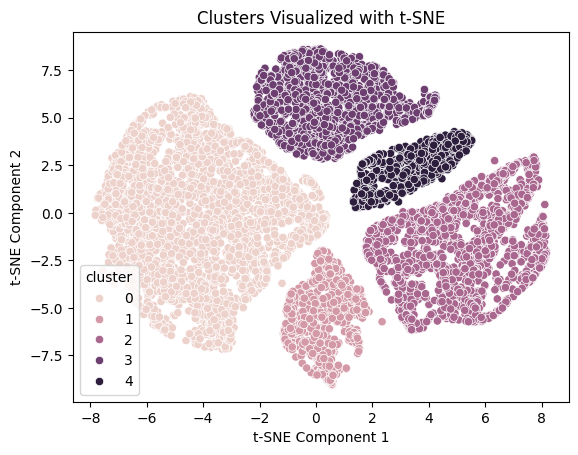

In [ ]:
df_tsne['cluster'] = hier_model.labels_

sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

## 7. <a name="7">DBSCAN</a>
(<a href="#7">Go to top</a>)

In [ ]:
dbscan = DBSCAN(eps=2.5, min_samples=5).fit(df_copy3)

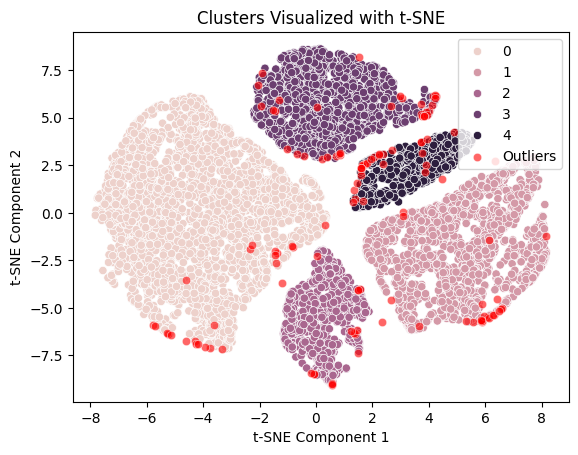

In [ ]:
df_tsne['cluster'] = dbscan.labels_

outliers_mask = df_tsne['cluster'] == -1
df_tsne_without_outliers = df_tsne[~outliers_mask]


sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne_without_outliers)


outliers_mask = df_tsne['cluster'] == -1
sns.scatterplot(x=df_tsne.loc[outliers_mask, 't-SNE Component 1'],
                y=df_tsne.loc[outliers_mask, 't-SNE Component 2'],
                color='red',
                label='Outliers',
                alpha=0.6)

plt.title('Clusters Visualized with t-SNE')
plt.legend()
plt.show()

## 8. <a name="8">GaussianMixture</a>
(<a href="#8">Go to top</a>)

In [ ]:
gaussian_model = GaussianMixture(n_components=5,covariance_type='full')
labels_ = gaussian_model.fit_predict(df_copy3)

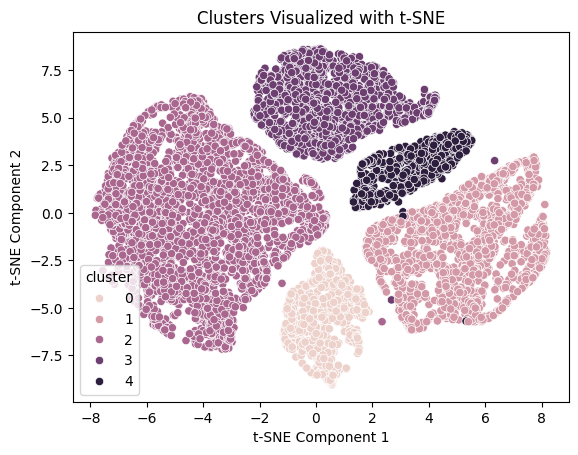

In [ ]:
df_tsne['cluster'] = labels_


sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne)
plt.title('Clusters Visualized with t-SNE')
plt.show()

Hierarchical Clustering has been identified as the most effective model for clustering customers

## 9. <a name="9">Specifications for each cluster</a>
(<a href="#9">Go to top</a>)

In [ ]:
final_df = df.copy()
final_df.dropna(inplace=True)
final_df.drop(columns=['CUST_ID'],inplace=True)
final_df['Cluster'] = hier_model.labels_

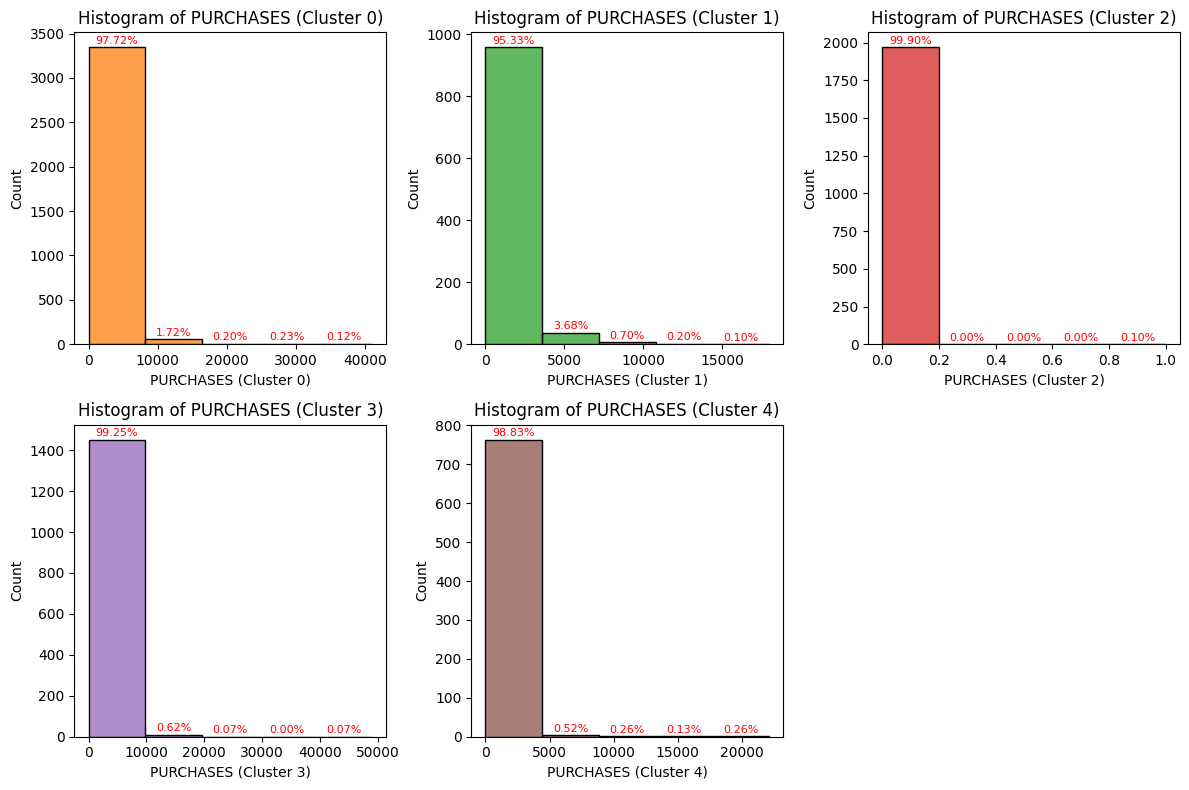

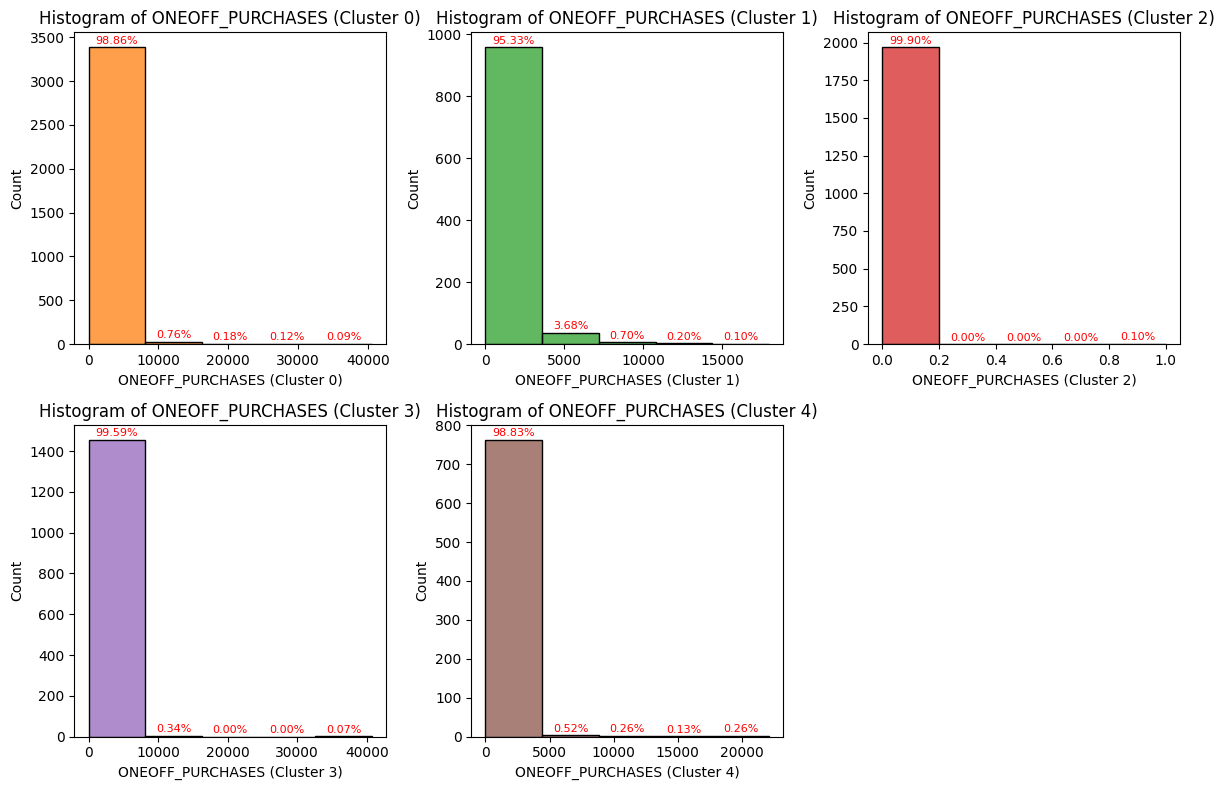

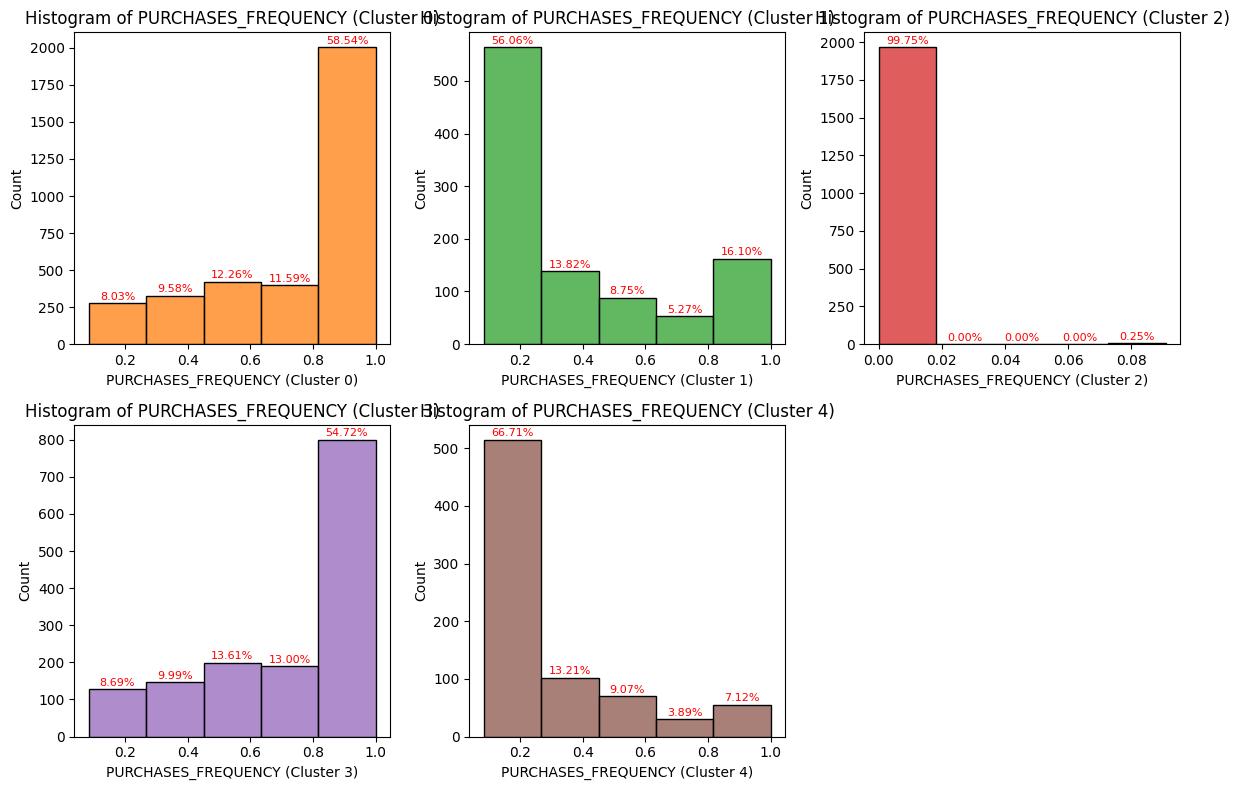

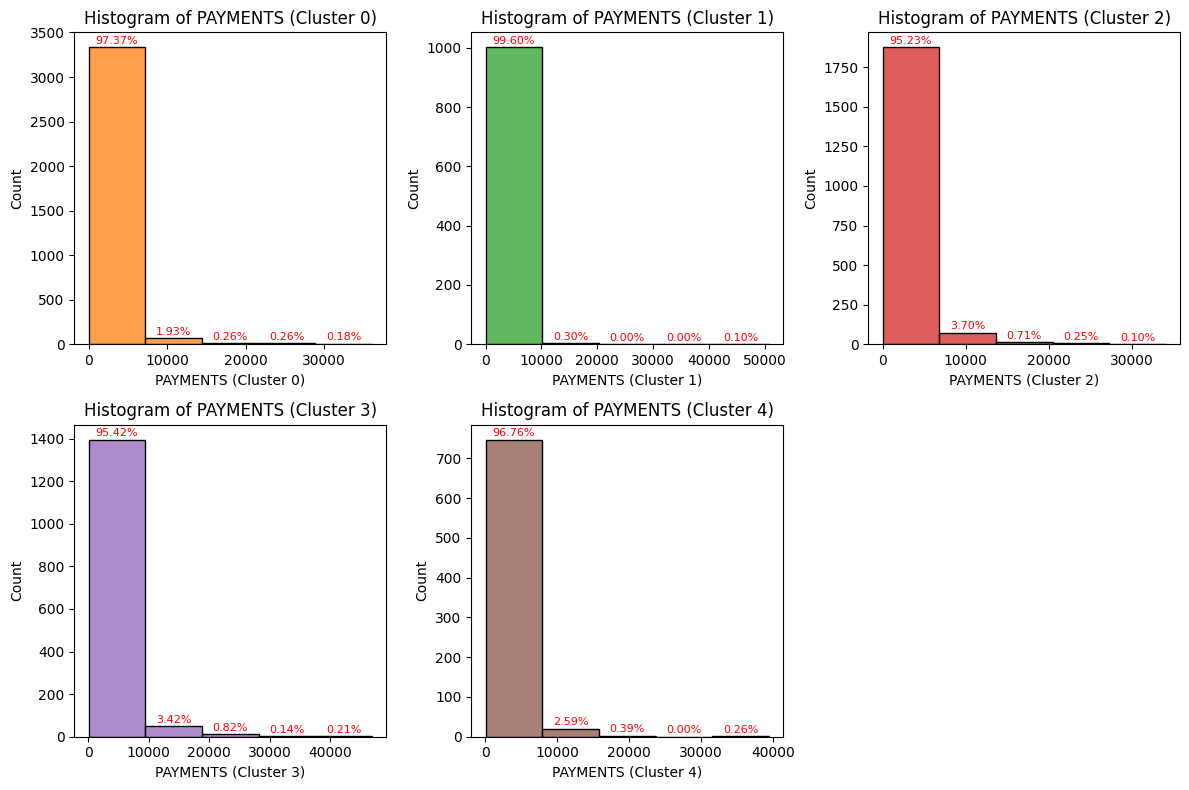

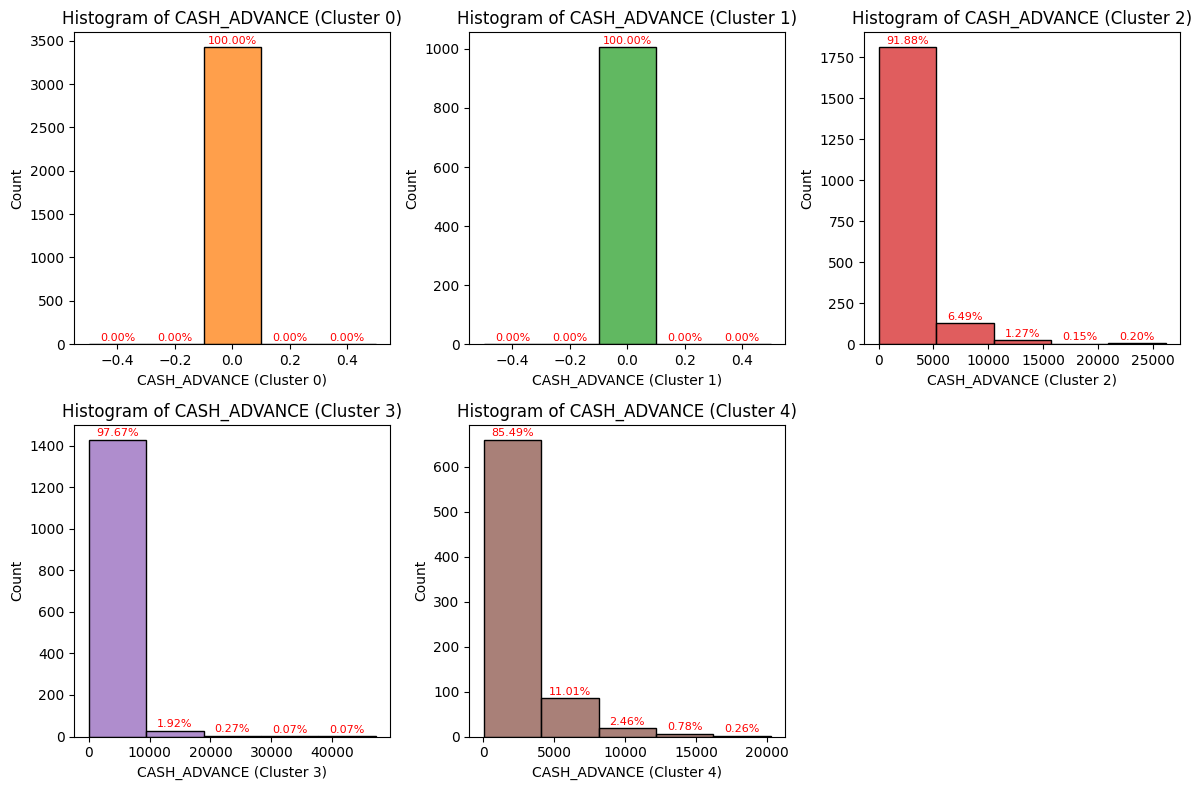

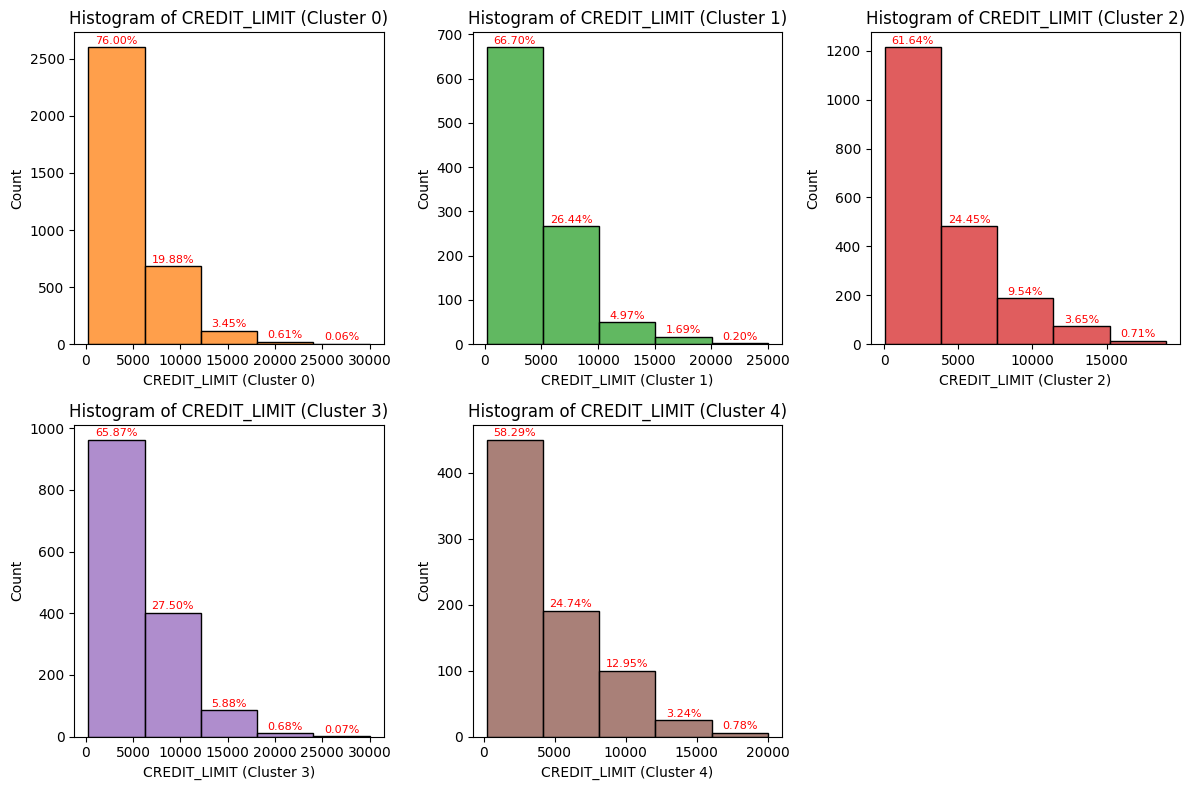

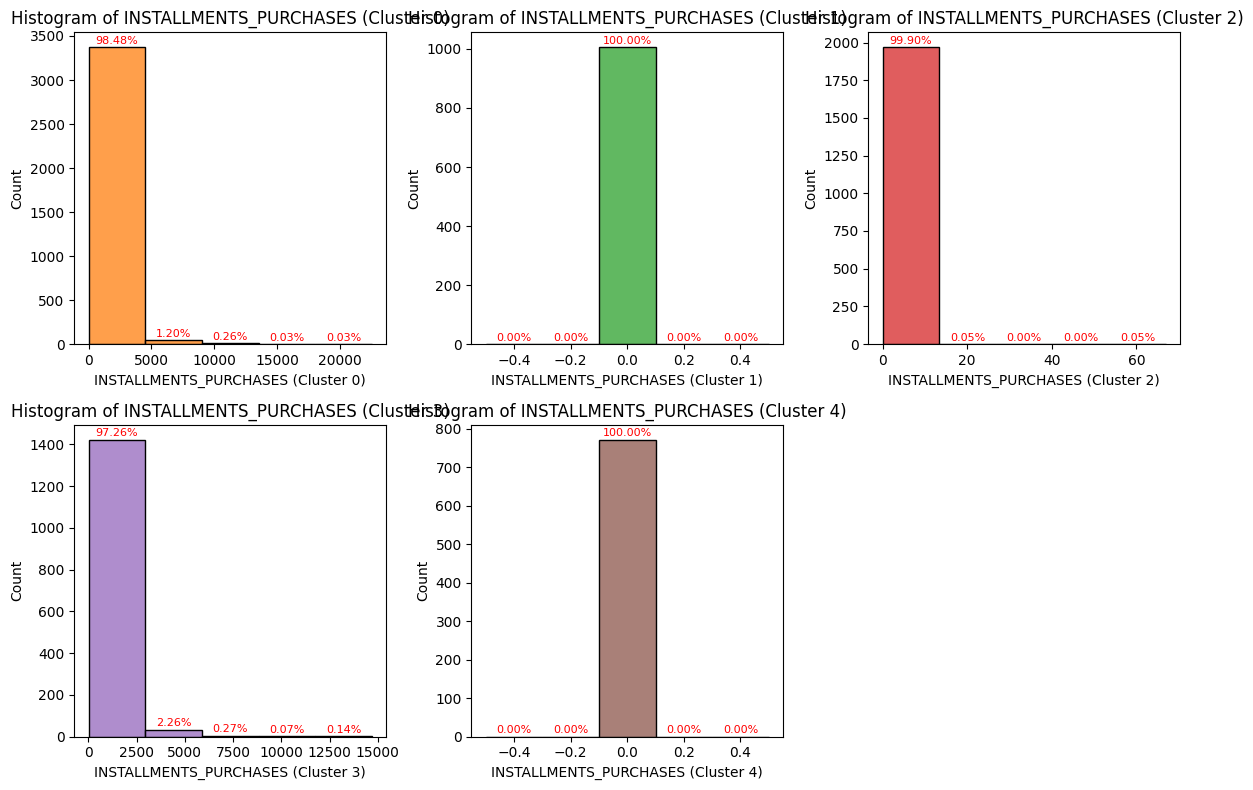

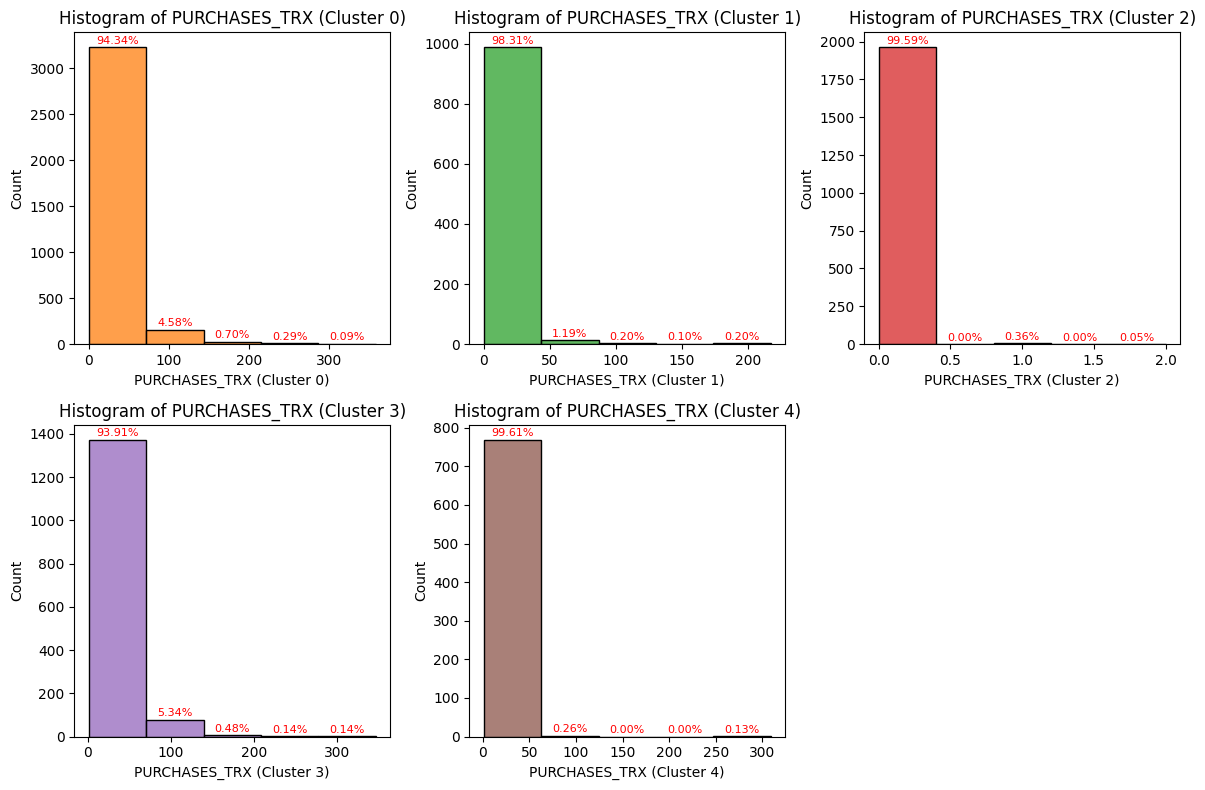

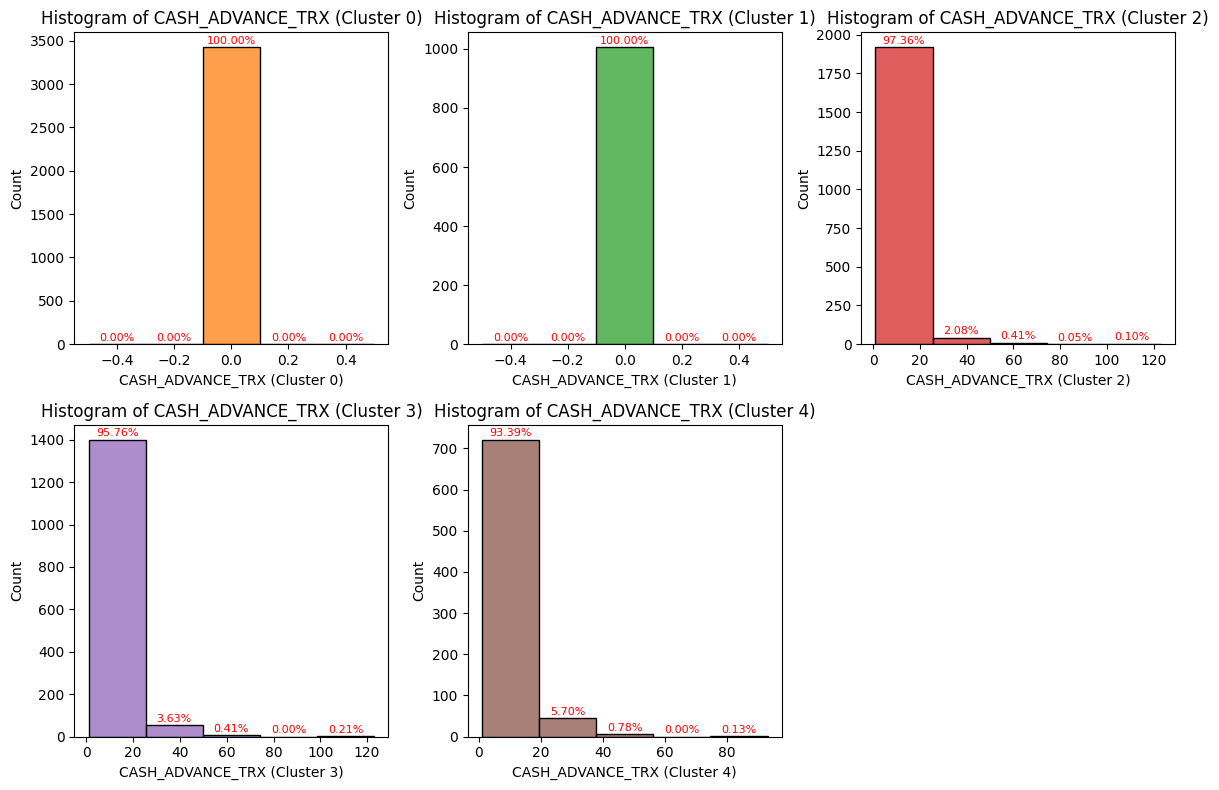

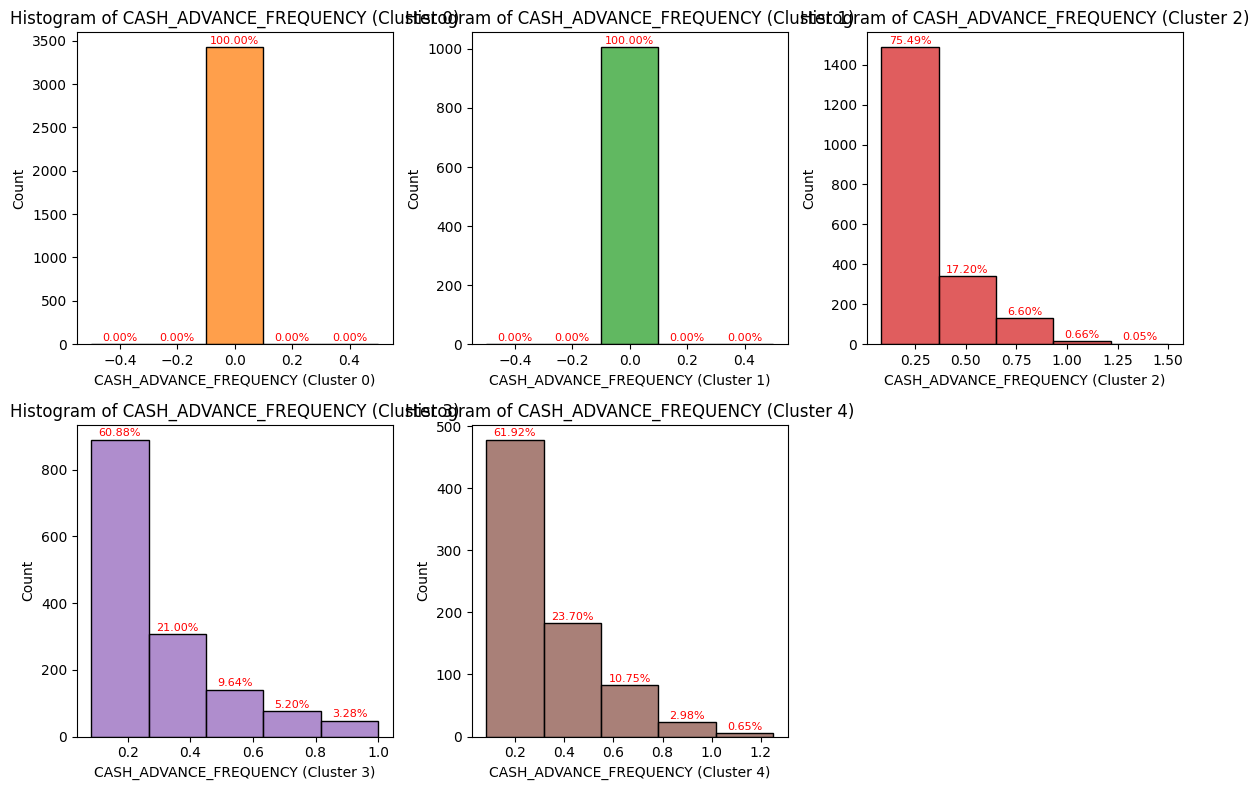

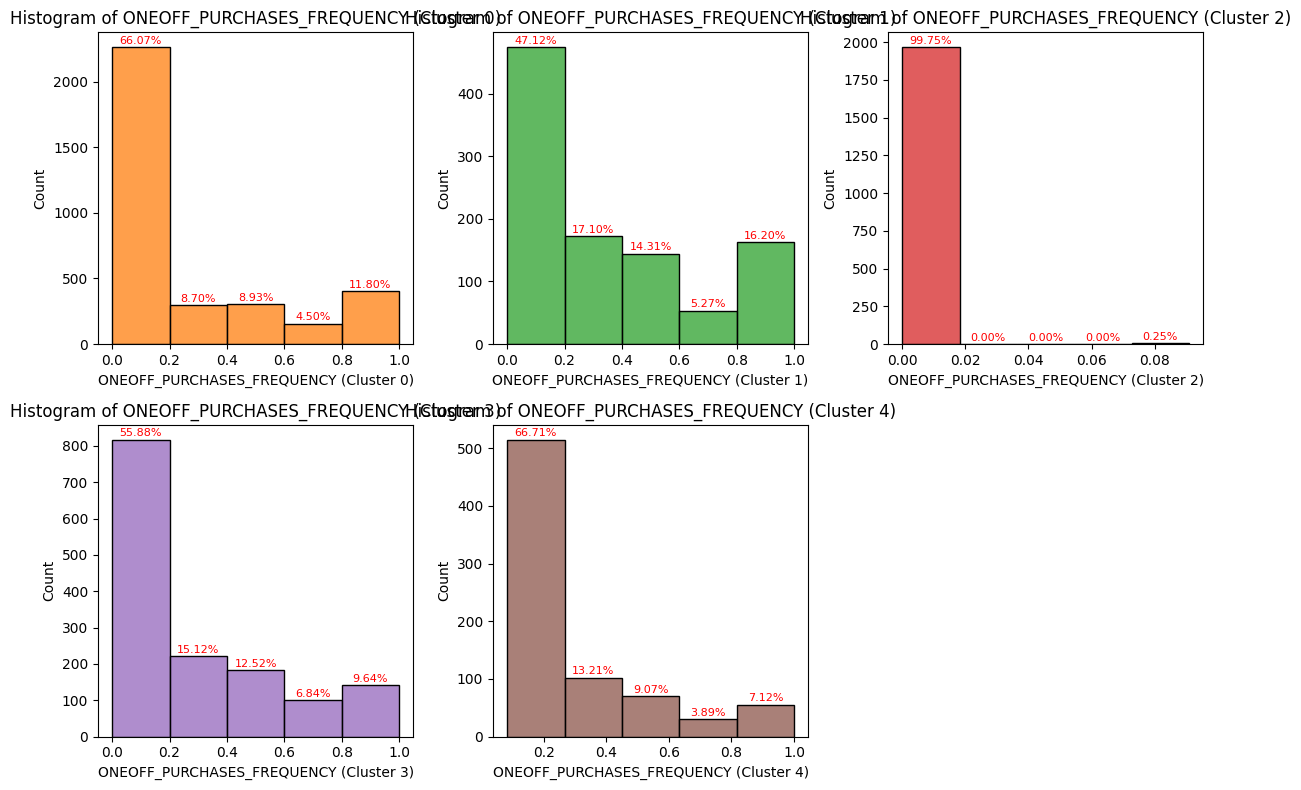

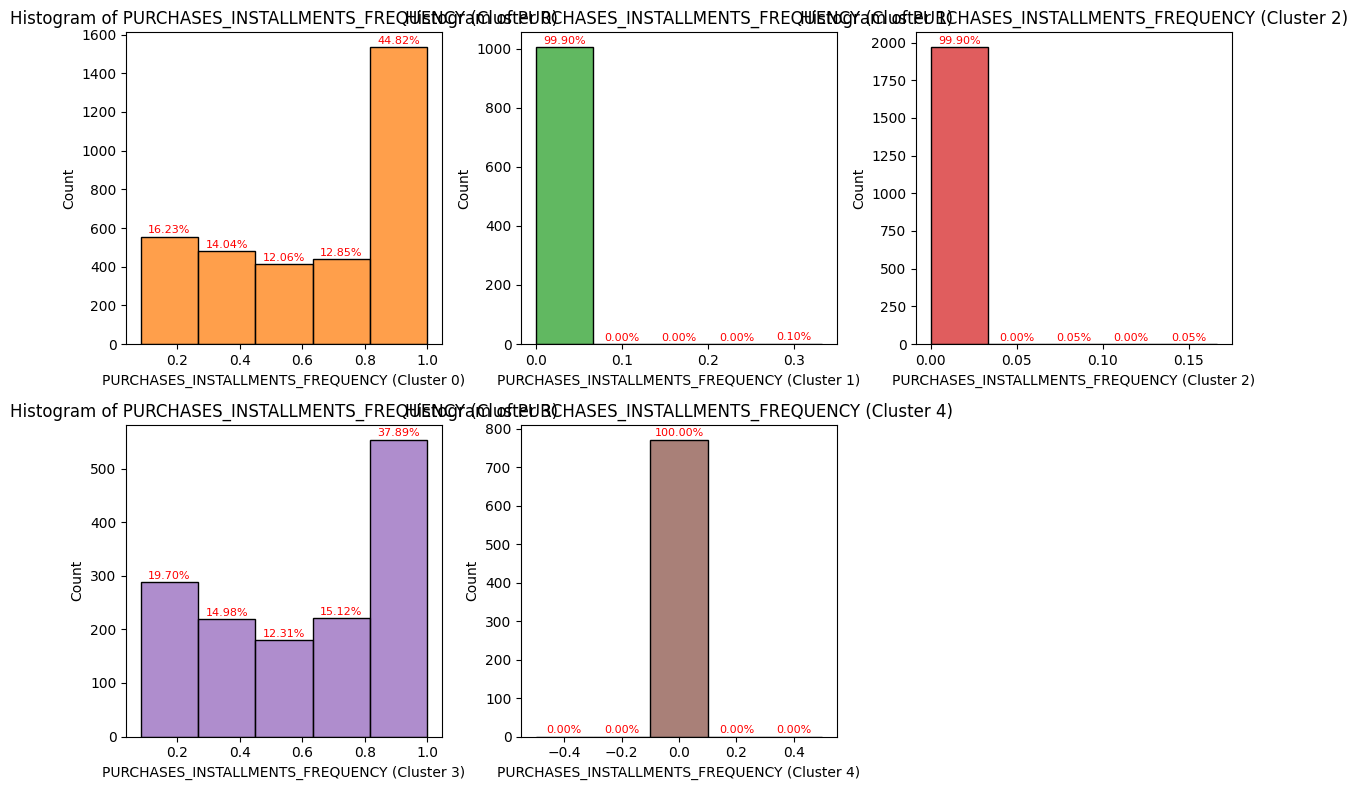

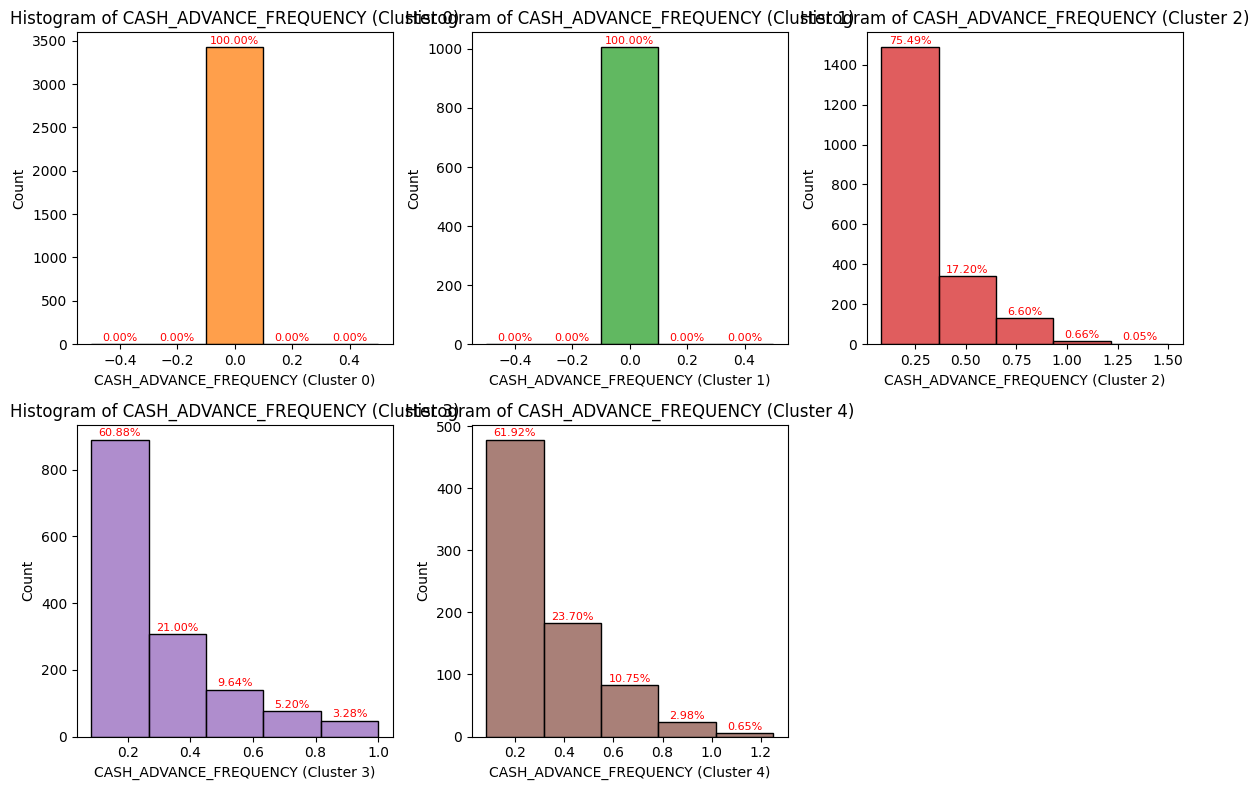

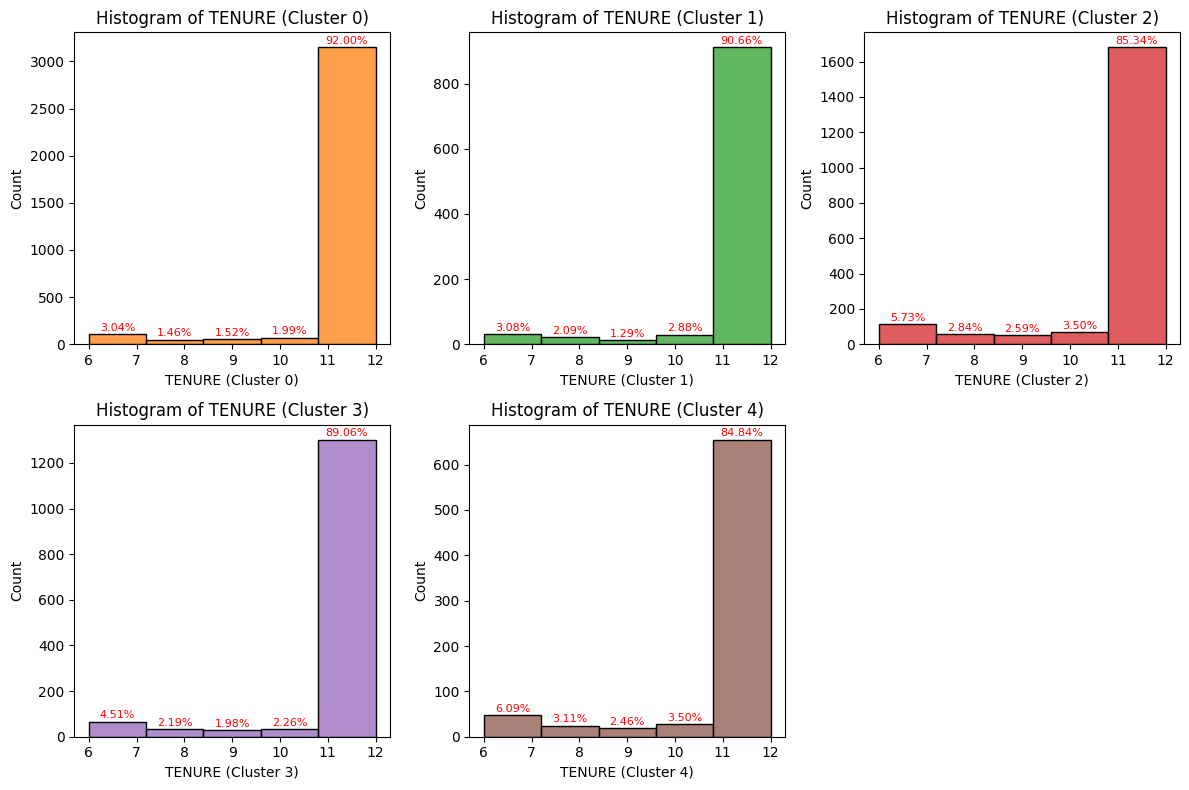

In [ ]:
columns_ = ['PURCHASES', 'ONEOFF_PURCHASES' ,'PURCHASES_FREQUENCY','PAYMENTS', 'CASH_ADVANCE','CREDIT_LIMIT' ,'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX',
        'CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'TENURE']
for column in columns_:
    plt.figure(figsize=(12, 8))
    for i in range(5):
        cluster_data = final_df[final_df['Cluster'] == i]
        plt.subplot(2, 3, i + 1)
        sns.histplot(cluster_data[column], bins=5, kde=False, color=f'C{i+1}')
        plt.xlabel(f'{column} (Cluster {i})')
        plt.ylabel('Count')
        plt.title(f'Histogram of {column} (Cluster {i})')


        counts, bins = np.histogram(cluster_data[column], bins=5)
        percentages = (counts / len(cluster_data[column])) * 100

        for count, bin_edge, percentage in zip(counts, bins[:-1], percentages):
            plt.annotate(f'{percentage:.2f}%', xy=(bin_edge + np.diff(bins)[0] / 2, count), xytext=(0, 1),
                         textcoords='offset points', ha='center', va='bottom', fontsize=8, color='red')

    plt.tight_layout()
    plt.show()

**Cluster 0:**
- Customers in this cluster tend to make frequent purchases, both one-off and installment purchases.
- They have a relatively high purchase frequency and make moderate payments.
- They have a high number of purchase and cash advance transactions.
- They have a moderate credit limit and a relatively short tenure.

**Cluster 1:**
- Customers in this cluster tend to make infrequent purchases, both one-off and installment purchases.
- They have a low purchase frequency and make low payments.
- They have a low number of purchase and cash advance transactions.
- They have a low credit limit and a relatively short tenure.

**Cluster 2:**
- Customers in this cluster tend to make moderate purchases, both one-off and installment purchases.
- They have a moderate purchase frequency and make moderate payments.
- They have a moderate number of purchase and cash advance transactions.
- They have a high credit limit and a relatively long tenure.

**Cluster 3:**
- Customers in this cluster tend to make high purchases, both one-off and installment purchases.
- They have a high purchase frequency and make high payments.
- They have a high number of purchase and cash advance transactions.
- They have a high credit limit and a relatively long tenure.

**Cluster 4:**
- Customers in this cluster tend to make low purchases, both one-off and installment purchases.
- They have a low purchase frequency and make low payments.
- They have a low number of purchase and cash advance transactions.
- They have a low credit limit and a relatively short tenure.
